# 1961 - 1990  for the radiation
# 1981 - 2000
# 1991 -2020

leidinicesilva@gmail.com

# LAB Exercises

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
import os
from matplotlib.colors import TwoSlopeNorm
from IPython.display import display

# Toa Net incoming Solar radiation(1961 -1990)

In [2]:
%%bash
cdo yearmean TOA_solar_61_90.nc TOA_solar_61_90_ymean.nc
cdo timmean TOA_solar_61_90_ymean.nc global_TOA_solar_61_90.nc

cdi  warning (cdfInqContents): Coordinates variable number can't be assigned!
ntents): Coordinates variable expver can't be assigned!


In [3]:
o =xr.open_dataset('TOA_solar_61_90.nc')
o

<xarray.Dataset> Size: 1GB
Dimensions:     (valid_time: 360, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 3kB 1961-01-01T06:00:00 ... 1990-...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      (valid_time) <U4 6kB ...
Data variables:
    avg_tnswrf  (valid_time, latitude, longitude) float32 1GB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts

In [4]:
toa = xr.open_dataset('global_TOA_solar_61_90.nc')
toa

<xarray.Dataset> Size: 4MB
Dimensions:          (valid_time: 1, bnds: 2, longitude: 1440, latitude: 721)
Coordinates:
  * valid_time       (valid_time) datetime64[ns] 8B 1975-12-16T06:00:00
  * longitude        (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
  * latitude         (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
Dimensions without coordinates: bnds
Data variables:
    valid_time_bnds  (valid_time, bnds) datetime64[ns] 16B ...
    avg_tnswrf       (valid_time, latitude, longitude) float32 4MB ...
Attributes:
    CDI:                     Climate Data Interface version 2.4.4 (https://mp...
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    frequency:               year
    history:                 Wed Apr 02 00:24:17 2025: cdo timmean TOA_solar_...
    CDO:                     Climate Data Operators version 2.4.4 (https://mp...

In [5]:
ts = toa['avg_tnswrf'] 
ts

<xarray.DataArray 'avg_tnswrf' (valid_time: 1, latitude: 721, longitude: 1440)> Size: 4MB
[1038240 values with dtype=float32]
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 8B 1975-12-16T06:00:00
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
Attributes: (12/33)
    standard_name:                            unknown
    long_name:                                Time-mean top net short-wave ra...
    units:                                    W m**-2
    cell_methods:                             valid_time: mean
    GRIB_paramId:                             235039
    GRIB_dataType:                            fc
    ...                                       ...
    GRIB_missingValue:                        3.4028234663852886e+38
    GRIB_name:                                Time-mean top net short-wave ra...
    GRIB_shortName:                           avg_tnswrf
    GRIB_totalNumber:                         0
    GRIB_units:                               W m**-2
    GRIB_surface:                             0.0

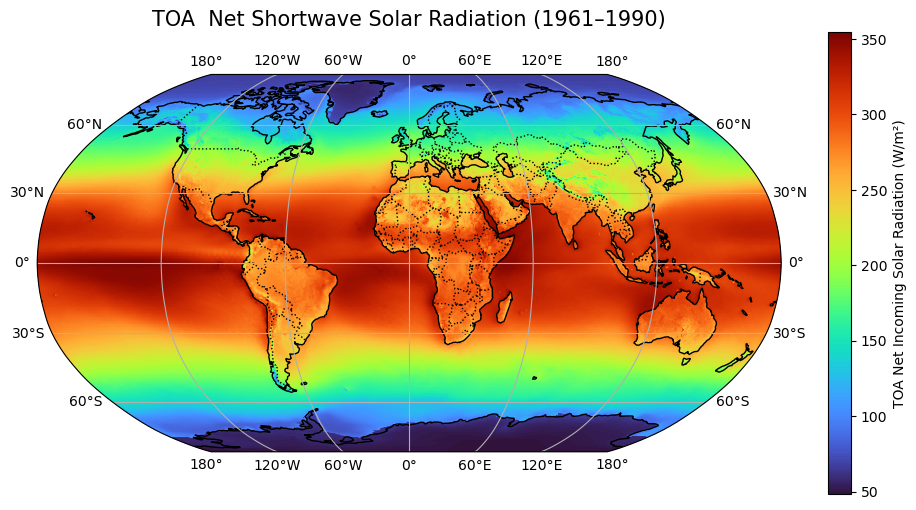

In [6]:
# Create the plot
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson())

ts.plot(ax=ax, transform=ccrs.PlateCarree(), cmap="turbo", cbar_kwargs={"label": "TOA Net Incoming Solar Radiation (W/m²)"})
# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)

# Add gridlines
ax.gridlines(draw_labels=True)

# Add title
plt.title("TOA  Net Shortwave Solar Radiation (1961–1990)", fontsize=15, pad=20)

# Save the plot
plt.savefig("TOA  Net Solar Radiation.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

# TOA Net outgoing longwave

In [7]:
ds = xr.open_dataset('global_longwave.nc')
ds

<xarray.Dataset> Size: 4MB
Dimensions:          (valid_time: 1, bnds: 2, longitude: 1440, latitude: 721)
Coordinates:
  * valid_time       (valid_time) datetime64[ns] 8B 1975-12-16T06:00:00
  * longitude        (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
  * latitude         (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
Dimensions without coordinates: bnds
Data variables:
    valid_time_bnds  (valid_time, bnds) datetime64[ns] 16B ...
    avg_tnlwrf       (valid_time, latitude, longitude) float32 4MB ...
Attributes:
    CDI:                     Climate Data Interface version 2.4.4 (https://mp...
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    frequency:               year
    history:                 Fri Mar 21 16:56:29 2025: cdo timmean longwave_y...
    CDO:                     Climate Data Operators version 2.4.4 (https://mp...

In [8]:
outcome = ds['avg_tnlwrf'] * -1
outcome

<xarray.DataArray 'avg_tnlwrf' (valid_time: 1, latitude: 721, longitude: 1440)> Size: 4MB
array([[[192.04578, 192.04578, 192.04578, ..., 192.04578, 192.04578,
         192.04578],
        [192.09586, 192.09604, 192.09625, ..., 192.09615, 192.09604,
         192.09587],
        [192.20375, 192.20396, 192.20432, ..., 192.20433, 192.2042 ,
         192.20413],
        ...,
        [146.16579, 146.1666 , 146.16782, ..., 146.16577, 146.16635,
         146.16634],
        [146.00157, 146.00262, 146.00365, ..., 146.001  , 146.0011 ,
         146.00139],
        [145.41286, 145.41286, 145.41286, ..., 145.41286, 145.41286,
         145.41286]]], dtype=float32)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 8B 1975-12-16T06:00:00
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0

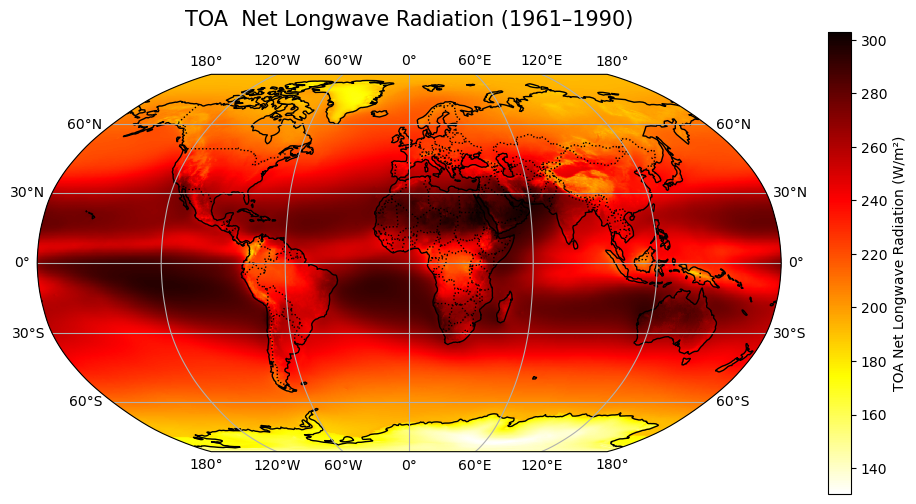

In [9]:
# Create the plot
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson())

outcome.plot(ax=ax, transform=ccrs.PlateCarree(), cmap="hot_r", cbar_kwargs={"label": "TOA Net Longwave Radiation (W/m²)"})
# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)

# Add gridlines
ax.gridlines(draw_labels=True)

# Add title
plt.title("TOA  Net Longwave Radiation (1961–1990)", fontsize=15, pad=20)

# Save the plot
plt.savefig("TOA  Net Longwave Radiation.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

# TOA Shortwave Incoming Solar Radiation

In [10]:
sh = xr.open_dataset('global_TOA_solar.nc')
sh

<xarray.Dataset> Size: 4MB
Dimensions:          (valid_time: 1, bnds: 2, longitude: 1440, latitude: 721)
Coordinates:
  * valid_time       (valid_time) datetime64[ns] 8B 2005-12-15T18:00:00
  * longitude        (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
  * latitude         (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
Dimensions without coordinates: bnds
Data variables:
    valid_time_bnds  (valid_time, bnds) datetime64[ns] 16B ...
    avg_tnswrf       (valid_time, latitude, longitude) float32 4MB ...
Attributes:
    CDI:                     Climate Data Interface version 2.4.4 (https://mp...
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    frequency:               year
    history:                 Fri Mar 21 19:03:12 2025: cdo timmean TOA_solar_...
    CDO:                     Climate Data Operators version 2.4.4 (https://mp...

In [11]:
toa_s = sh['avg_tnswrf']
toa_s

<xarray.DataArray 'avg_tnswrf' (valid_time: 1, latitude: 721, longitude: 1440)> Size: 4MB
[1038240 values with dtype=float32]
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 8B 2005-12-15T18:00:00
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
Attributes: (12/33)
    standard_name:                            unknown
    long_name:                                Time-mean top net short-wave ra...
    units:                                    W m**-2
    cell_methods:                             valid_time: mean
    GRIB_paramId:                             235039
    GRIB_dataType:                            fc
    ...                                       ...
    GRIB_missingValue:                        3.4028234663852886e+38
    GRIB_name:                                Time-mean top net short-wave ra...
    GRIB_shortName:                           avg_tnswrf
    GRIB_totalNumber:                         0
    GRIB_units:                               W m**-2
    GRIB_surface:                             0.0

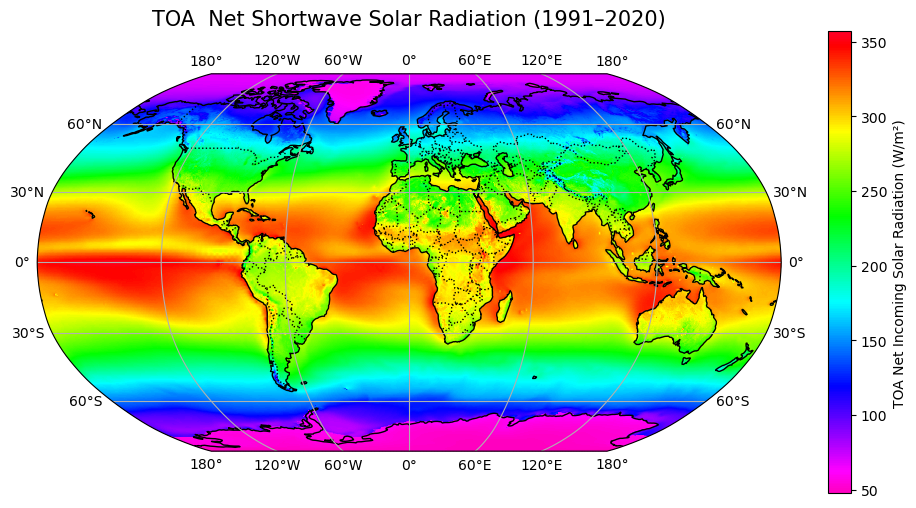

In [12]:
# Create the plot
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson())

toa_s.plot(ax=ax, transform=ccrs.PlateCarree(), cmap="gist_rainbow_r", cbar_kwargs={"label": "TOA Net Incoming Solar Radiation (W/m²)"})
# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)

# Add gridlines
ax.gridlines(draw_labels=True)

# Add title
plt.title("TOA  Net Shortwave Solar Radiation (1991–2020)", fontsize=15, pad=20)

# Save the plot
plt.savefig("TOA Net Solar Radiation-1991-2020.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

# Net_surface Radiation (Rs)

In [13]:
sur = xr.open_dataset('Net_surface_rad.nc')
sur

<xarray.Dataset> Size: 4MB
Dimensions:          (valid_time: 1, bnds: 2, longitude: 1440, latitude: 721)
Coordinates:
  * valid_time       (valid_time) datetime64[ns] 8B 2005-12-15T18:00:00
  * longitude        (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
  * latitude         (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
Dimensions without coordinates: bnds
Data variables:
    valid_time_bnds  (valid_time, bnds) datetime64[ns] 16B ...
    avg_snswrf       (valid_time, latitude, longitude) float32 4MB ...
Attributes:
    CDI:                     Climate Data Interface version 2.4.4 (https://mp...
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    frequency:               year
    history:                 Fri Mar 21 17:51:56 2025: cdo timmean Net_surfac...
    CDO:                     Climate Data Operators version 2.4.4 (https://mp...

In [14]:
surface_rs = sur['avg_snswrf'] 
surface_rs

<xarray.DataArray 'avg_snswrf' (valid_time: 1, latitude: 721, longitude: 1440)> Size: 4MB
[1038240 values with dtype=float32]
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 8B 2005-12-15T18:00:00
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
Attributes: (12/33)
    standard_name:                            unknown
    long_name:                                Time-mean surface net short-wav...
    units:                                    W m**-2
    cell_methods:                             valid_time: mean
    GRIB_paramId:                             235037
    GRIB_dataType:                            fc
    ...                                       ...
    GRIB_missingValue:                        3.4028234663852886e+38
    GRIB_name:                                Time-mean surface net short-wav...
    GRIB_shortName:                           avg_snswrf
    GRIB_totalNumber:                         0
    GRIB_units:                               W m**-2
    GRIB_surface:                             0.0

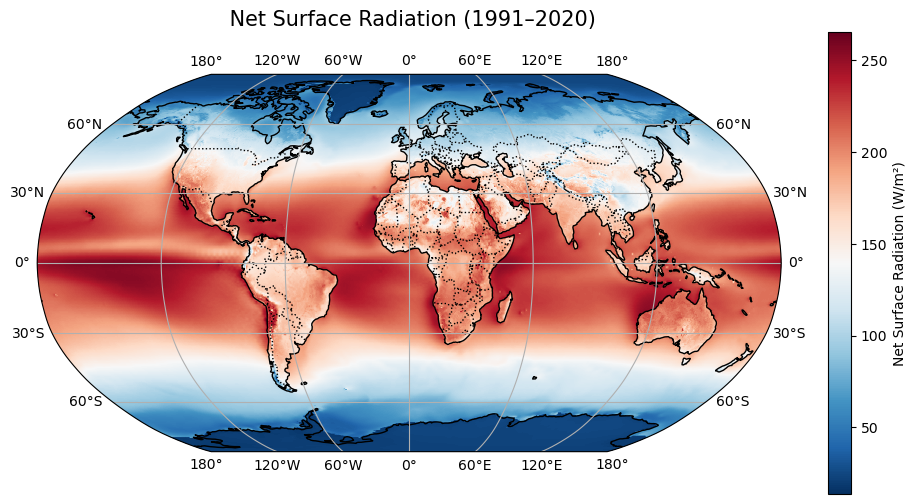

In [15]:
# Create the plot
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson())

surface_rs.plot(ax=ax, transform=ccrs.PlateCarree(), cmap="RdBu_r" , cbar_kwargs={"label": "Net Surface Radiation (W/m²)"})
# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)

# Add gridlines
ax.gridlines(draw_labels=True)

# Add title
plt.title(" Net Surface Radiation (1991–2020)", fontsize=15, pad=20)

# Save the plot
plt.savefig("Net Surface Radiation.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

# Latent Heat flux

In [16]:
data = xr.open_dataset('global_latentheat.nc')
data

<xarray.Dataset> Size: 4MB
Dimensions:          (valid_time: 1, bnds: 2, longitude: 1440, latitude: 721)
Coordinates:
  * valid_time       (valid_time) datetime64[ns] 8B 2005-12-15T18:00:00
  * longitude        (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
  * latitude         (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
Dimensions without coordinates: bnds
Data variables:
    valid_time_bnds  (valid_time, bnds) datetime64[ns] 16B ...
    avg_slhtf        (valid_time, latitude, longitude) float32 4MB ...
Attributes:
    CDI:                     Climate Data Interface version 2.4.4 (https://mp...
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    frequency:               year
    history:                 Fri Mar 21 18:39:55 2025: cdo timmean lateheat_y...
    CDO:                     Climate Data Operators version 2.4.4 (https://mp...

In [17]:
latent = data['avg_slhtf'] * -1
latent

<xarray.DataArray 'avg_slhtf' (valid_time: 1, latitude: 721, longitude: 1440)> Size: 4MB
array([[[ 4.596852  ,  4.596852  ,  4.596852  , ...,  4.596852  ,
          4.596852  ,  4.596852  ],
        [ 4.5238266 ,  4.523978  ,  4.5242605 , ...,  4.5241523 ,
          4.5241737 ,  4.524109  ],
        [ 4.6044474 ,  4.605315  ,  4.60614   , ...,  4.603666  ,
          4.603471  ,  4.6039267 ],
        ...,
        [-0.29772288, -0.297788  , -0.29787478, ..., -0.29741907,
         -0.29752758, -0.2976578 ],
        [-0.29407704, -0.29418555, -0.29429406, ..., -0.29396853,
         -0.29392514, -0.29390344],
        [-0.28381228, -0.28381228, -0.28381228, ..., -0.28381228,
         -0.28381228, -0.28381228]]], dtype=float32)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 8B 2005-12-15T18:00:00
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0

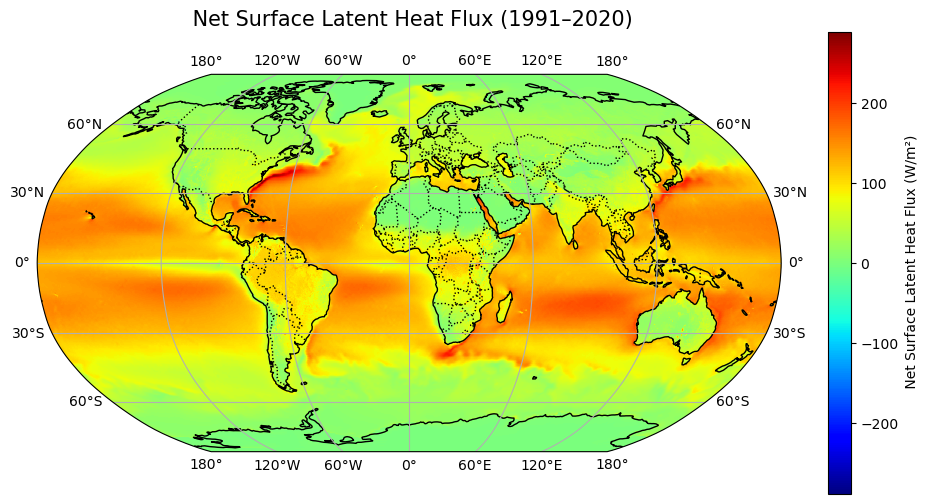

In [18]:
# Create the plot
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson())

latent.plot(ax=ax, transform=ccrs.PlateCarree(), cmap= "jet", cbar_kwargs={"label": " Net Surface Latent Heat Flux (W/m²)"})
# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)

# Add gridlines
ax.gridlines(draw_labels=True)

# Add title
plt.title(" Net Surface Latent Heat Flux (1991–2020)", fontsize=15, pad=20)

# Save the plot
plt.savefig("Surface Latent Heat Flux.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

# Sensible Heat Flux

In [19]:
sens =  xr.open_dataset("global_sensible.nc")
sens

<xarray.Dataset> Size: 4MB
Dimensions:          (valid_time: 1, bnds: 2, longitude: 1440, latitude: 721)
Coordinates:
  * valid_time       (valid_time) datetime64[ns] 8B 2005-12-15T18:00:00
  * longitude        (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
  * latitude         (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
Dimensions without coordinates: bnds
Data variables:
    valid_time_bnds  (valid_time, bnds) datetime64[ns] 16B ...
    avg_ishf         (valid_time, latitude, longitude) float32 4MB ...
Attributes:
    CDI:                     Climate Data Interface version 2.4.4 (https://mp...
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    frequency:               year
    history:                 Fri Mar 21 18:48:39 2025: cdo timmean sensible_y...
    CDO:                     Climate Data Operators version 2.4.4 (https://mp...

In [20]:
sensible = sens['avg_ishf'] * -1
sensible

<xarray.DataArray 'avg_ishf' (valid_time: 1, latitude: 721, longitude: 1440)> Size: 4MB
array([[[ -2.0672076,  -2.0672076,  -2.0672076, ...,  -2.0672076,
          -2.0672076,  -2.0672076],
        [ -2.002939 ,  -2.000888 ,  -1.998794 , ...,  -2.0060856,
          -2.0049462,  -2.0039914],
        [ -1.897416 ,  -1.8948009,  -1.8911225, ...,  -1.9017236,
          -1.8997705,  -1.8982948],
        ...,
        [-18.347254 , -18.354687 , -18.363724 , ..., -18.324022 ,
         -18.331585 , -18.339277 ],
        [-17.64082  , -17.646147 , -17.651495 , ..., -17.629946 ,
         -17.63356  , -17.637184 ],
        [-16.115568 , -16.115568 , -16.115568 , ..., -16.115568 ,
         -16.115568 , -16.115568 ]]], dtype=float32)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 8B 2005-12-15T18:00:00
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0

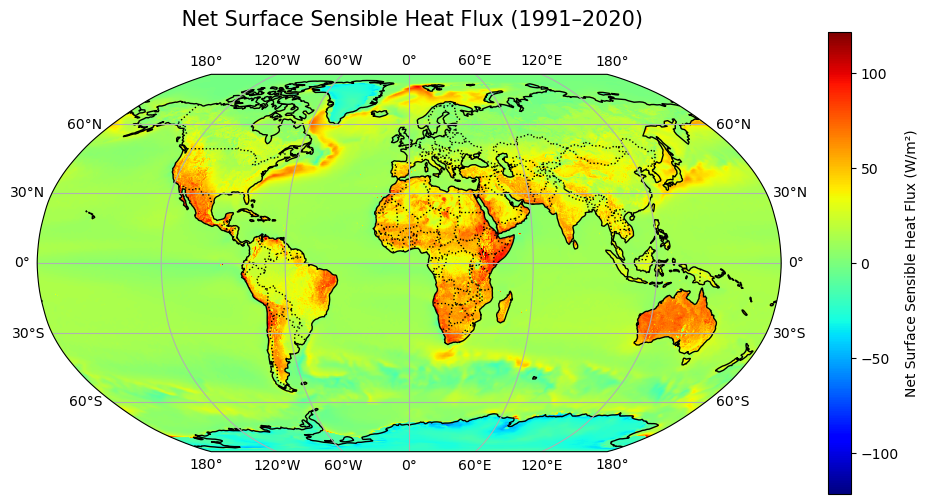

In [21]:
# Create the plot
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson())

sensible.plot(ax=ax, transform=ccrs.PlateCarree(), cmap= "jet", cbar_kwargs={"label": "Net Surface Sensible Heat Flux (W/m²)"})
# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)

# Add gridlines
ax.gridlines(draw_labels=True)

# Add title
plt.title(" Net Surface Sensible Heat Flux (1991–2020)", fontsize=15, pad=20)

# Save the plot
plt.savefig("Surface Sensible Heat Flux.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

# Net Global_heat Storage

In [22]:
%%bash

# Input files
rs_file="Net_surface.nc"  # Solar Radiation (avg_snswrf)
lh_file="Net_latentheat.nc"  # Latent Heat Flux (avg_slhtf)
sh_file="Net_sensible.nc"  # Sensible Heat Flux (avg_ishf)

# Output files
gh_file="ground_heat.nc"
yearmean_gh_file="gh.nc"
global_gh_file="global_gh.nc"

# Compute Ground Heat (GH)
echo "Computing Ground Heat (GH)..."
cdo expr,'gh=avg_snswrf-(avg_slhtf*-1)-(avg_ishf*-1)' $rs_file $lh_file $sh_file $gh_file

# Calculate Yearly Mean
echo "Calculating Yearly Mean..."
cdo yearmean $gh_file $yearmean_gh_file

# Calculate Time Mean
echo "Calculating Time Mean..."
cdo timmean $yearmean_gh_file $global_gh_file

# Plot the Data
echo "Plotting the Data..."
ncview $global_gh_file &

echo "Process completed. Check the output files and plot."

Computing Ground Heat (GH)...



cdo (Abort): 
 Net_sensible.nc ground_heat.nc  vg_ishf*-1) Net_surface.nc Net_latentheat.nc
        ^ Operator cannot be assigned.                         
       Reason:
         No Operators with missing input left.



Calculating Yearly Mean...
Calculating Time Mean...
Plotting the Data...
Process completed. Check the output files and plot.


Ncview 2.1.8 David W. Pierce  8 March 2017
http://meteora.ucsd.edu:80/~pierce/ncview_home_page.html
Copyright (C) 1993 through 2015, David W. Pierce
ls type `ncview -w'.SOLUTELY NO WARRANTY; for detai
type `ncview -c' for redistribution details. General Public License version 3; 

X connection to :0 broken (explicit kill or server shutdown).


In [23]:
ground = xr.open_dataset('global_gh.nc')
ground

<xarray.Dataset> Size: 4MB
Dimensions:          (valid_time: 1, bnds: 2, longitude: 1440, latitude: 721)
Coordinates:
  * valid_time       (valid_time) datetime64[ns] 8B 2005-12-15T18:00:00
  * longitude        (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
  * latitude         (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
Dimensions without coordinates: bnds
Data variables:
    valid_time_bnds  (valid_time, bnds) datetime64[ns] 16B ...
    gh               (valid_time, latitude, longitude) float32 4MB ...
Attributes:
    CDI:                     Climate Data Interface version 2.4.4 (https://mp...
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    history:                 Wed Apr 02 00:26:08 2025: cdo timmean gh.nc glob...
    frequency:               year
    CDO:                     Climate Data Operators version 2.4.4 (https://mp...

In [24]:
gh = ground['gh']
gh

<xarray.DataArray 'gh' (valid_time: 1, latitude: 721, longitude: 1440)> Size: 4MB
[1038240 values with dtype=float32]
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 8B 2005-12-15T18:00:00
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
Attributes:
    cell_methods:  valid_time: mean

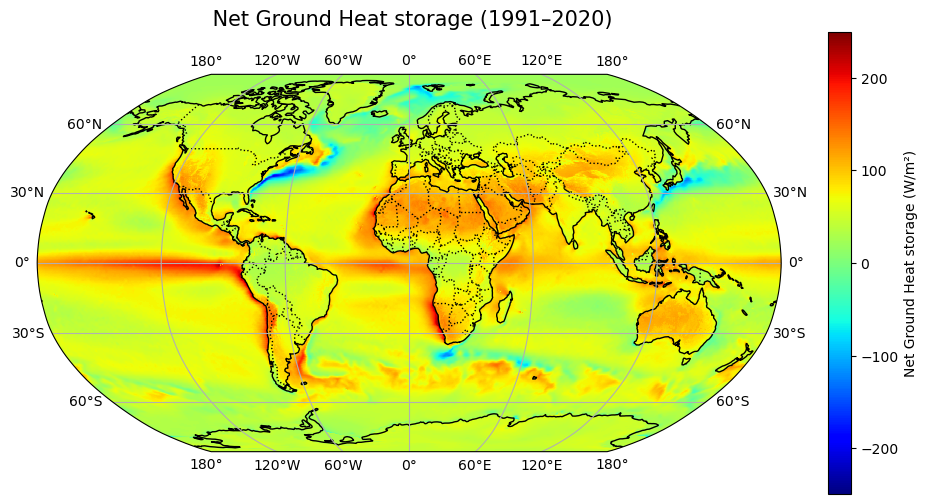

In [25]:
# Create the plot
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson())

gh.plot(ax=ax, transform=ccrs.PlateCarree(), cmap= "jet", cbar_kwargs={"label": "Net Ground Heat storage (W/m²)"})
# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)

# Add gridlines
ax.gridlines(draw_labels=True)

# Add title
plt.title(" Net Ground Heat storage (1991–2020)", fontsize=15, pad=20)

# Save the plot
plt.savefig("Net Ground Heat storage.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

# Seasonal Variation of the Surface Energy Balance

### Shell Script for Data Processing

This script processes climate data files to extract specific variables, calculate ground heat storage, and compute monthly means. The steps are as follows:

1. Extract data for a Savanah region in Ghana (latitude: 9.08333300, longitude: -1.81666700).
2. Calculate ground heat storage (GH = Rs - Lh - Sh).
3. Compute monthly means for each variable.

In [26]:
%%bash
# Input files for each variable
rs_file="Net_surface.nc"  # Solar Radiation (avg_snswrf)
lh_file="Net_latentheat.nc"  # Latent Heat Flux (avg_slhtf)
sh_file="Net_sensible.nc"  # Sensible Heat Flux (avg_ishf)

# Output directory for saving processed files
output_dir="output_files"
mkdir -p "$output_dir"

#  Extract data for the specific point (latitude: 9.08333300, longitude: -1.81666700)
savannah_rs="${output_dir}/savannah_rs.nc"
cdo -remapnn,lon=-1.8166670_lat=9.08333300 "$rs_file" "$savannah_rs"

savannah_lh="${output_dir}/savannah_lh.nc"
cdo -remapnn,lon=-1.8166670_lat=9.08333300 "$lh_file" "$savannah_lh"

savannah_sh="${output_dir}/savannah_sh.nc"
cdo -remapnn,lon=-1.8166670_lat=9.08333300 "$sh_file" "$savannah_sh"

# Calculate Ground Heat Storage (GH = Rs - Lh - Sh)
savannah_gh="${output_dir}/savannah_gh.nc"
cdo expr,'GH=avg_snswrf-(avg_slhtf*-1)-(avg_ishf*-1)' -merge "$savannah_rs" "$savannah_lh" "$savannah_sh" "$savannah_gh"

#  Calculate monthly means for each variable
rs_monthly="${output_dir}/rs_monthly.nc"
cdo ymonmean "$savannah_rs" "$rs_monthly"

lh_monthly="${output_dir}/lh_m# onthly.nc"
cdo ymonmean "$savannah_lh" "$lh_monthly"

sh_monthly="${output_dir}/sh_monthly.nc"
cdo ymonmean "$savannah_sh" "$sh_monthly"

gh_monthly="${output_dir}/gh_monthly.nc"
cdo ymonmean "$savannah_gh" "$gh_monthly"

echo "Data processing complete. Output files saved in: $output_dir"

cdi  warning (cdfInqContents): Coordinates variable number can't be assigned!
ntents): Coordinates variable expver can't be assigned!


cdo    remapnn: Nearest neighbor weights from lonlat (1440x721) to lonlat (1x1) grid


cdi  warning (cdfInqContents): Coordinates variable number can't be assigned!
ntents): Coordinates variable expver can't be assigned!


cdo    remapnn: Nearest neighbor weights from lonlat (1440x721) to lonlat (1x1) grid


cdi  warning (cdfInqContents): Coordinates variable number can't be assigned!
ntents): Coordinates variable expver can't be assigned!


cdo    remapnn: Nearest neighbor weights from lonlat (1440x721) to lonlat (1x1) grid



cdo (Abort): 
ymonmean output_files/savannah_lh.nc [ output_files/lh_m# onthly.nc ]  
                                ^ Bracket not closed


Data processing complete. Output files saved in: output_files


### Another way is to use the monthly mean data and averaged it again to get 1D spatial mean if i dont compute the fldmean

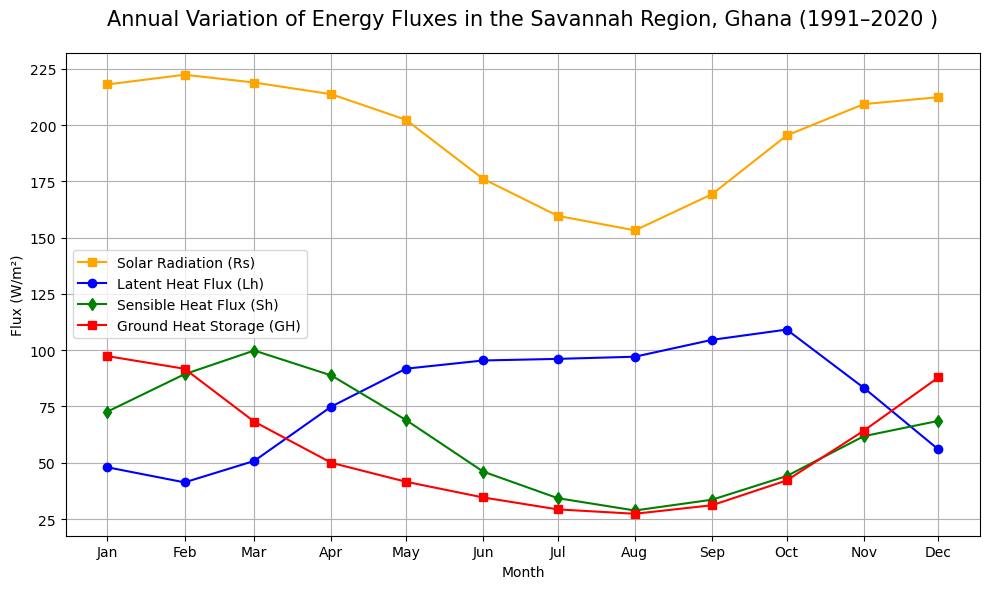

In [27]:


# Load the monthly mean data for each variable
rs_monthly = xr.open_dataset("output_files/rs_monthly.nc")["avg_snswrf"]
lh_monthly = xr.open_dataset("output_files/lh_monthly.nc")["avg_slhtf"] * -1
sh_monthly = xr.open_dataset("output_files/sh_monthly.nc")["avg_ishf"] * -1
gh_monthly = xr.open_dataset("output_files/gh_monthly.nc")["GH"]

# Ensures the data is 1D
rs_monthly = rs_monthly.mean(dim=["lat", "lon"])
lh_monthly = lh_monthly.mean(dim=["lat", "lon"])
sh_monthly = sh_monthly.mean(dim=["lat", "lon"])
gh_monthly = gh_monthly.mean(dim=["lat", "lon"])


# Create a time series plot
months = pd.date_range(start="2023-01-01", periods=12, freq="MS")  # Dummy dates for plotting

plt.figure(figsize=(10, 6))

# Plot each variable
plt.plot(months, rs_monthly, label="Solar Radiation (Rs)", color="orange", marker="s")
plt.plot(months, lh_monthly, label="Latent Heat Flux (Lh)", color="blue", marker="o")
plt.plot(months, sh_monthly, label="Sensible Heat Flux (Sh)", color="green", marker="d")
plt.plot(months, gh_monthly, label="Ground Heat Storage (GH)", color="red", marker="s")

# Add labels, title, and legend
plt.xlabel("Month")
plt.ylabel("Flux (W/m²)")
plt.title("Annual Variation of Energy Fluxes in the Savannah Region, Ghana (1991–2020 )",fontsize=15, pad=20)
plt.xticks(months, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.savefig("seasonal Variation of Energy Fluxes in the Savannah Region, Ghana.png", dpi=300, bbox_inches="tight")
plt.show()


<summary>
    <h3>Reasons for the Nature of the Plot:</h3>
    <details>
        <p>
            The study area experiences a unimodal rainfall pattern, with rainfall occurring primarily between May and October each year. Annual rainfall records range between 500 mm and 1200 mm [28]. Additionally, the mean monthly temperature in the region varies from 27&deg;C to 36&deg;C [19]. These climatic conditions influence the energy fluxes depicted in the plot.
        </p>
        <p>
            During the rainy season:
            <ul>
                <li>Solar radiation is expected to be lower than in the dry season due to increased cloud cover, which dims incoming solar radiation.</li>
                <li>Latent heat fluxes are expected to rise because of increased evaporation.</li>
                <li>Sensible heat flux is expected to be lower.</li>
                <li>Ground heat storage is expected to decrease during the rainy season and rise again when the rains cease and solar radiation begins to peak.</li>
            </ul>
        </p>
        <p>
            For further insight into the climatology of the area, refer to this research paper: 
            <a href="https://www.researchgate.net/publication/347156768_Rainfall_variabilities_and_droughts_in_the_Savannah_zone_of_Ghana_from_1960-2015" target="_blank">Rainfall Variabilities and Droughts in the Savannah Zone of Ghana from 1960-2015</a>.
        </p>
    </details>
</summary>

### Shell Script for Data Processing

This script processes climate data files to extract specific variables, calculate ground heat storage, and compute monthly means. The steps are as follows:

1. Extract data for a Asante Akim North District  in Ghana (longitude: -1.20° to -0.15°, latitude: 6.30° to 7.30°)
2. Calculate ground heat storage (GH = Rs - Lh - Sh).
3. Compute monthly means for each variable.
4. Calculate the field mean.

In [28]:
%%bash

# Input files for each variable
rs_file="Net_surface.nc"  # Solar Radiation (avg_snswrf)
lh_file="Net_latentheat.nc"  # Latent Heat Flux (avg_slhtf)
sh_file="Net_sensible.nc"  # Sensible Heat Flux (avg_ishf)

# Output directory for saving processed files
output_dir="Seasonal_Variation"
mkdir -p "$output_dir"

# Extract data for the Asante Akim North District (longitude: -1.20° to -0.15°, latitude: 6.30° to 7.30°)
south_rs="${output_dir}/south_rs.nc"
cdo -sellonlatbox,-1.20,-0.15,6.30,7.30 "$rs_file" "$south_rs"

south_lh="${output_dir}/south_lh.nc"
cdo -sellonlatbox,-1.20,-0.15,6.30,7.30 "$lh_file" "$south_lh"

south_sh="${output_dir}/south_sh.nc"
cdo -sellonlatbox,-1.20,-0.15,6.30,7.30 "$sh_file" "$south_sh"

# Calculate Ground Heat Storage (GH = Rs - Lh - Sh)
# Ensure variable names match those in your NetCDF files
south_gh="${output_dir}/south_gh.nc"
cdo expr,'GH=avg_snswrf-(avg_slhtf*-1)-(avg_ishf*-1)' -merge "$south_rs" "$south_lh" "$south_sh" "$south_gh"

# Calculate monthly means for each variable
rs_monthly="${output_dir}/rs_monthly.nc"
cdo ymonmean "$south_rs" "$rs_monthly"

lh_monthly="${output_dir}/lh_monthly.nc"
cdo ymonmean "$south_lh" "$lh_monthly"

sh_monthly="${output_dir}/sh_monthly.nc"
cdo ymonmean "$south_sh" "$sh_monthly"

gh_monthly="${output_dir}/gh_monthly.nc"
cdo ymonmean "$south_gh" "$gh_monthly"

# Calculate spatial means
rs_mean="${output_dir}/rs_mean.nc"
cdo fldmean "$rs_monthly" "$rs_mean"

lh_mean="${output_dir}/lh_mean.nc"
cdo fldmean "$lh_monthly" "$lh_mean"

sh_mean="${output_dir}/sh_mean.nc"
cdo fldmean "$sh_monthly" "$sh_mean"

gh_mean="${output_dir}/gh_mean.nc"
cdo fldmean "$gh_monthly" "$gh_mean"


echo "Data processing complete. Output files saved in: $output_dir"

cdi  warning (cdfInqContents): Coordinates variable number can't be assigned!
ntents): Coordinates variable expver can't be assigned!
cdi  warning (cdfInqContents): Coordinates variable number can't be assigned!
ntents): Coordinates variable expver can't be assigned!
cdi  warning (cdfInqContents): Coordinates variable number can't be assigned!
ntents): Coordinates variable expver can't be assigned!


Data processing complete. Output files saved in: Seasonal_Variation


### Used squeeze() to remove other dimesions (lat, lon) to ensure the data is 1D to plot if fldmean dta is used

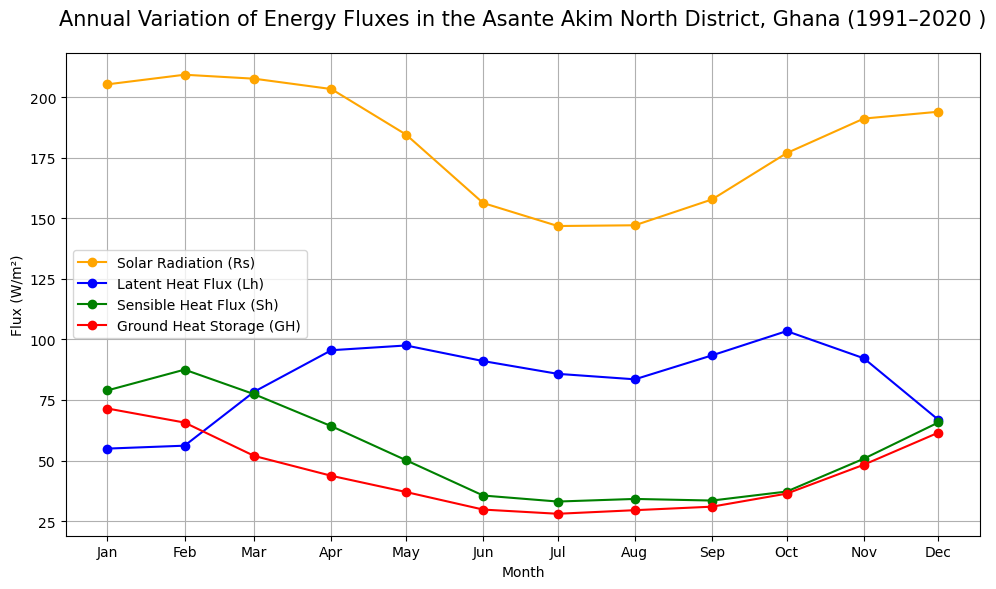

In [29]:

# Load the monthly mean data for each variable
rs_m= xr.open_dataset("Seasonal_Variation/rs_mean.nc")["avg_snswrf"].squeeze()
lh_m = xr.open_dataset("Seasonal_Variation/lh_mean.nc")["avg_slhtf"].squeeze() * -1
sh_m = xr.open_dataset("Seasonal_Variation/sh_mean.nc")["avg_ishf"].squeeze() * -1
gh_m = xr.open_dataset("Seasonal_Variation/gh_mean.nc")["GH"].squeeze()

# Create a time series plot
months = pd.date_range(start="2023-01-01", periods=12, freq="MS")  # Dummy dates for plotting

plt.figure(figsize=(10, 6))

# Plot each variable
plt.plot(months, rs_m, label="Solar Radiation (Rs)", color="orange", marker="o")
plt.plot(months, lh_m, label="Latent Heat Flux (Lh)", color="blue", marker="o")
plt.plot(months, sh_m, label="Sensible Heat Flux (Sh)", color="green", marker="o")
plt.plot(months, gh_m, label="Ground Heat Storage (GH)", color="red", marker="o")

# Add labels, title, and legend
plt.xlabel("Month")
plt.ylabel("Flux (W/m²)")
plt.title("Annual Variation of Energy Fluxes in the Asante Akim North District, Ghana (1991–2020 )", fontsize=15, pad=20)
plt.xticks(months, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
#plt.savefig("Seasonal_Variation_of_Energy_Fluxes_in_the_Asante_Akim_Ghana.png", dpi=300, bbox_inches="tight")
plt.show()


### Another way is to use the monthly mean data and averaged it again to get 1D spatial mean

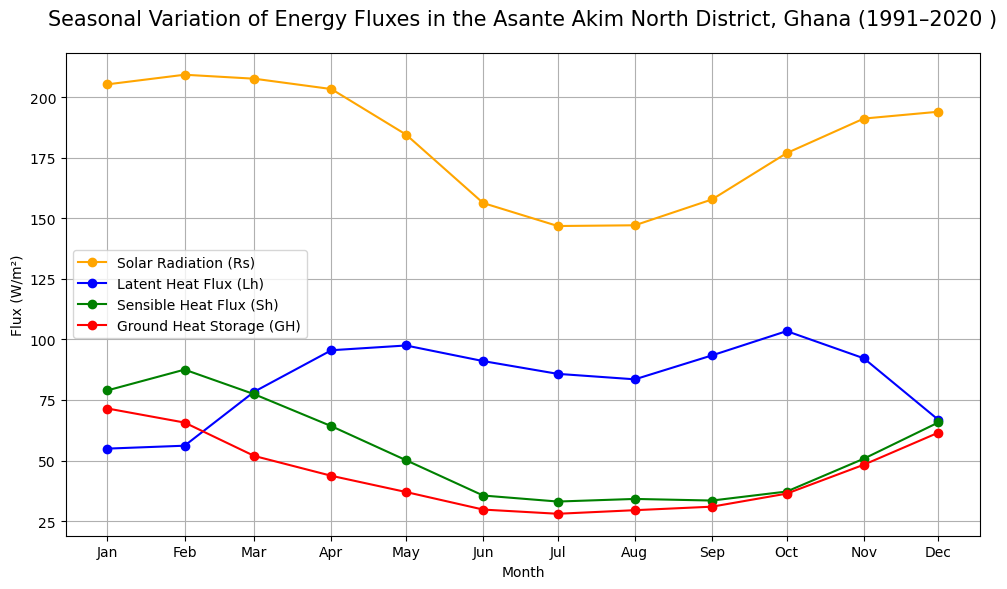

In [30]:


# Load the monthly mean data for each variable
rs_monthly = xr.open_dataset("Seasonal_Variation/rs_monthly.nc")["avg_snswrf"]
lh_monthly = xr.open_dataset("Seasonal_Variation/lh_monthly.nc")["avg_slhtf"] * -1
sh_monthly = xr.open_dataset("Seasonal_Variation/sh_monthly.nc")["avg_ishf"] * -1
gh_monthly = xr.open_dataset("Seasonal_Variation/gh_monthly.nc")["GH"]

# Ensure the data is 1D (12 values)
rs_monthly = rs_monthly.mean(dim=["latitude", "longitude"])
lh_monthly = lh_monthly.mean(dim=["latitude", "longitude"])
sh_monthly = sh_monthly.mean(dim=["latitude", "longitude"])
gh_monthly = gh_monthly.mean(dim=["latitude", "longitude"])

# Create a time series plot
months = pd.date_range(start="2023-01-01", periods=12, freq="MS")  # Dummy dates for plotting

plt.figure(figsize=(10, 6))

# Plot each variable
plt.plot(months, rs_monthly, label="Solar Radiation (Rs)", color="orange", marker="o")
plt.plot(months, lh_monthly, label="Latent Heat Flux (Lh)", color="blue", marker="o")
plt.plot(months, sh_monthly, label="Sensible Heat Flux (Sh)", color="green", marker="o")
plt.plot(months, gh_monthly, label="Ground Heat Storage (GH)", color="red", marker="o")

# Add labels, title, and legend
plt.xlabel("Month")
plt.ylabel("Flux (W/m²)")
plt.title("Seasonal Variation of Energy Fluxes in the Asante Akim North District, Ghana (1991–2020 )", fontsize=15, pad=20)
plt.xticks(months, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.savefig("Seasonal_Variation_of_Energy_Fluxes_in_the_Asante_Akim_Ghana.png", dpi=300, bbox_inches="tight")
plt.show()

### Reasons for the Nature of the Plot:

- **Solar Radiation (Rs):** Solar radiation is high during the dry season (December to March) due to clear skies and minimal cloud cover. It decreases during the rainy seasons as cloud cover increases, reducing the amount of solar energy reaching the surface.

- **Latent Heat Flux (Lh):** Latent heat flux rises during the rainy seasons (May to July and September to November) due to increased evaporation from the surface. This is driven by higher moisture availability and vegetation activity during these periods.

- **Sensible Heat Flux (Sh):** Sensible heat flux peaks during the dry season when surface heating is maximized. During the rainy seasons, more energy is diverted to latent heat flux (evaporation), reducing sensible heat flux.

- **Ground Heat Storage (GH):** Ground heat storage varies seasonally, influenced by the balance between incoming solar radiation and outgoing heat fluxes (latent and sensible). It typically follows the trend of solar radiation but with some lag due to the thermal inertia of the ground.

The study area experiences two rainy seasons:
1. **First Rainy Season:** May to July
2. **Second Rainy Season:** September to November

Temperatures remain uniformly high throughout the year, with a mean annual temperature of 26 ;C .

For further insight into the climatology of the area, refer to this research paper, specifically the **Materials and Methods** section in Chapter 2:  
[Link to the paper](https://www.sciencedirect.com/science/article/pii/S2666049023000154).

### Annual cycle of the terrestrial water balance

In [31]:
%%bash

# Input files
precip_file="Total_precip.nc"      # Precipitation (avg_trprate)
pet_file="Evapotrans.nc"           # Potential Evapotranspiration (avg_perv)
evap_file="Net_evaporation.nc"     # Evaporation (avg_ie)
temp_file="Temperature.nc"         # Temperature (t2m) in Kelvin

# Output directory
outfile="Seasonal_Variation"
mkdir -p "$outfile"

# Extract data for the Asante Akim North (longitude: -1.20° to -0.15°, latitude: 6.30° to 7.30°)
south_precip="${outfile}/south_precip.nc"
cdo -sellonlatbox,-1.20,-0.15,6.30,7.30 "$precip_file" "$south_precip"

south_pet="${outfile}/south_pet.nc"
cdo -sellonlatbox,-1.20,-0.15,6.30,7.30 "$pet_file" "$south_pet"

south_evap="${outfile}/south_evap.nc"
cdo -sellonlatbox,-1.20,-0.15,6.30,7.30 "$evap_file" "$south_evap"

south_temp="${outfile}/south_temp.nc"
cdo -sellonlatbox,-1.20,-0.15,6.30,7.30 "$temp_file" "$south_temp"

# Calculate monthly means (ymonmean)
precip_monthly="${outfile}/precip_monthly.nc"
cdo ymonmean "$south_precip" "$precip_monthly"

pet_monthly="${outfile}/pet_monthly.nc"
cdo ymonmean "$south_pet" "$pet_monthly"

evap_monthly="${outfile}/evap_monthly.nc"
cdo ymonmean "$south_evap" "$evap_monthly"

temp_monthly="${outfile}/temp_monthly.nc"
cdo ymonmean "$south_temp" "$temp_monthly"

# Calculate spatial means (fldmean)
precip_mean="${outfile}/precip_mean.nc"
cdo fldmean "$precip_monthly" "$precip_mean"

pet_mean="${outfile}/pet_mean.nc"
cdo fldmean "$pet_monthly" "$pet_mean"

evap_mean="${outfile}/evap_mean.nc"
cdo fldmean "$evap_monthly" "$evap_mean"

temp_mean="${outfile}/temp_mean.nc"
cdo fldmean "$temp_monthly" "$temp_mean"

# Convert units (kg m⁻² s⁻¹ → mm/day) (factor: 86400)
precip_mmday="${outfile}/precip_mmday.nc"
cdo mulc,86400 "$precip_mean" "$precip_mmday"

pet_mmday="${outfile}/pet_mmday.nc"
cdo mulc,86400 "$pet_mean" "$pet_mmday"

evap_mmday="${outfile}/evap_mmday.nc"
cdo mulc,86400 "$evap_mean" "$evap_mmday"

# Convert temperature from Kelvin to Celsius (optional)
temp_celsius="${outfile}/temp_celsius.nc"
cdo subc,273.15 "$temp_mean" "$temp_celsius"

echo "Data processing complete. Output files saved in: $outfile"

cdi  warning (cdfInqContents): Coordinates variable number can't be assigned!
ntents): Coordinates variable expver can't be assigned!
cdi  warning (cdfInqContents): Coordinates variable number can't be assigned!
ntents): Coordinates variable expver can't be assigned!
cdi  warning (cdfInqContents): Coordinates variable number can't be assigned!
ntents): Coordinates variable expver can't be assigned!
cdi  warning (cdfInqContents): Coordinates variable number can't be assigned!
ntents): Coordinates variable expver can't be assigned!


Data processing complete. Output files saved in: Seasonal_Variation


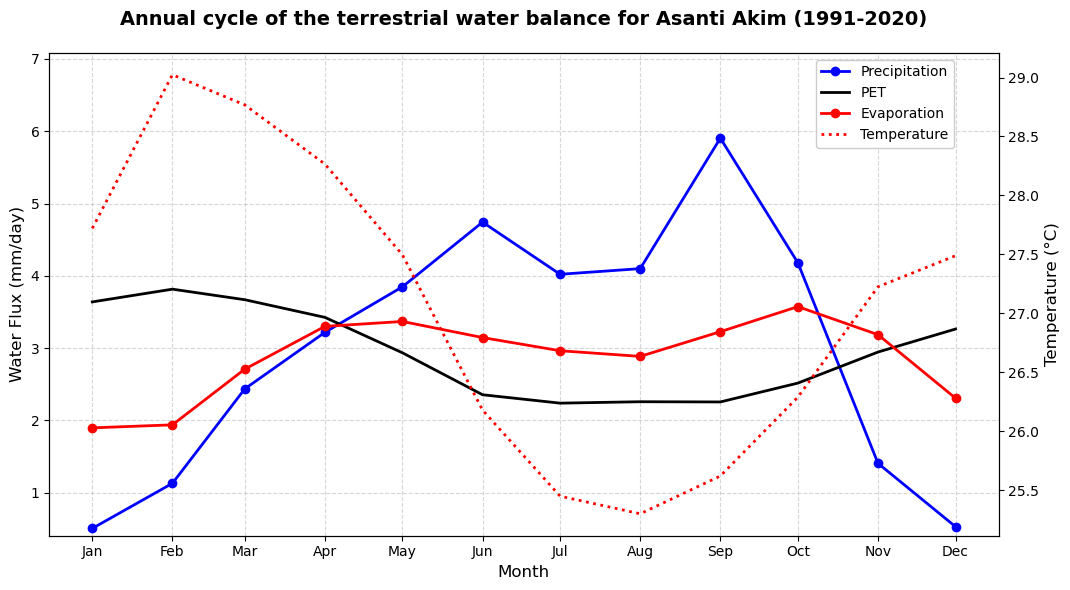

In [32]:
# Load  data
precip = xr.open_dataset("Seasonal_Variation/precip_mmday.nc")
pet = xr.open_dataset("Seasonal_Variation/pet_mmday.nc")
evap = xr.open_dataset("Seasonal_Variation/evap_mmday.nc")
temp = xr.open_dataset("Seasonal_Variation/temp_celsius.nc")

# Extract the time series values
precip_vals = precip["avg_tprate"].values.flatten()
pet_vals = pet["avg_pevr"].values.flatten() * -1
evap_vals = evap["avg_ie"].values.flatten() *-1
temp_vals = temp["t2m"].values.flatten()

# Create the time axis (12 months)
months = pd.date_range(start="2023-01-01", periods=12, freq="MS")

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot all water fluxes on primary axis
line1, = ax1.plot(months, precip_vals, label="Precipitation", 
                 color="blue", marker="o", linewidth=2)
line2, = ax1.plot(months, pet_vals, label="PET", 
                 color="black", linestyle="-", linewidth=2)
line3, = ax1.plot(months, evap_vals, label="Evaporation", 
                 color="red", marker="o", linewidth=2)

# Set y-axis limits for water fluxes (adjust if needed)
water_min = min(min(precip_vals), min(pet_vals), min(evap_vals))
water_max = max(max(precip_vals), max(pet_vals), max(evap_vals))
ax1.set_ylim(water_min - 0.2*abs(water_min), water_max * 1.2)  # 10% padding

# Configure primary axis
ax1.set_xlabel("Month", fontsize=12)
ax1.set_ylabel("Water Flux (mm/day)", fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.5)

# Create secondary axis for temperature
ax2 = ax1.twinx()
line4, = ax2.plot(months, temp_vals, label="Temperature", 
                 color="red", linestyle=":", linewidth=2)
ax2.set_ylabel("Temperature (°C)", fontsize=12)

# Add title and customize ticks
plt.title("Annual cycle of the terrestrial water balance for Asanti Akim (1991-2020)", 
         fontsize=14, pad=20, weight='bold')
ax1.set_xticks(months)
ax1.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

# Combine legends from both axes
lines = [line1, line2, line3, line4]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="best", 
          bbox_to_anchor=(0.8, 1), framealpha=1)

# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Make space on right side

# Save and show
plt.savefig("Seasonal_Variation/seasonal_fluxes_temp.png", 
           dpi=300, bbox_inches="tight")
plt.show()

### Diurnal Cycle

In [ ]:

groundwater = 12.3  # 10^6 km³
soil_moisture = 0.17  # 10^6 km³
total_volume = groundwater + soil_moisture  # 10^6 km³

# Convert to km³
total_volume_km3 = total_volume * 1e6  # km³

# Values  (in 10^3 km³/year)
precipitation_over_land = 107 * 1e3  # km³/year
runoff = 48 * 1e3  # km³/year
runoff_10_percent = 0.1 * runoff  # km³/year

#  Time for precipitation to replace groundwater and soil moisture
time_precipitation = total_volume_km3 / precipitation_over_land  # years

#  Time for 10% of runoff to replace groundwater and soil moisture
time_runoff_10_percent = total_volume_km3 / runoff_10_percent  # years

# Print results
print(f"Total volume of groundwater and soil moisture: {total_volume:.2f} x 10^6 km³")
print(f"Annual precipitation over land: {precipitation_over_land:.0f} km³/year")
print(f"Time for precipitation to replace groundwater and soil moisture: {time_precipitation:.2f} years")
print(f"Annual 10% runoff: {runoff_10_percent:.0f} km³/year")
print(f"Time for 10% runoff to replace groundwater and soil moisture: {time_runoff_10_percent:.2f} years")

In [1]:
%%bash
# Input files
PRECIP_FILE="hourly_precip.nc"    # Precipitation (avg_tprate)
PET_FILE="hourly_PET.nc"          # Potential ET (avg_perv) 
EVAP_FILE="hourly_evapo.nc"       # Evaporation (avg_ie)
TEMP_FILE="ttt.nc"                # Temperature (t2m)

# Output directory
OUTPUT_DIR="diurnal_results"
mkdir -p "$OUTPUT_DIR"

#  write permissions
chmod -R 755 "$OUTPUT_DIR"

# Conversion factor (kg m-2 s^-1 → mm/hour)
CONV_FACTOR=3600  # 60 sec/min * 60 min/hour 

echo "Converting units and calculating diurnal cycles..."

# Process precipitation, PET, and evaporation
for var in PRECIP PET EVAP; do
    infile="${var}_FILE"
    outname=$(echo "${var}" | tr '[:upper:]' '[:lower:]')
    
    if [ "$var" == "PET" ] || [ "$var" == "EVAP" ]; then
        # Convert to positive values and apply conversion factor
        cdo -abs "${!infile}" "$OUTPUT_DIR/${outname}_abs.nc"
        cdo -setrtoc,-inf,0,0 -mulc,$CONV_FACTOR "$OUTPUT_DIR/${outname}_abs.nc" "$OUTPUT_DIR/${outname}_mmhr.nc"
        rm "$OUTPUT_DIR/${outname}_abs.nc"
    else
        # Apply conversion factor directly for precipitation
        cdo -mulc,$CONV_FACTOR "${!infile}" "$OUTPUT_DIR/${outname}_mmhr.nc"
    fi
done

# Convert temperature from Kelvin to Celsius
cdo -subc,273.15 "$TEMP_FILE" "$OUTPUT_DIR/temp_C.nc"

# Calculate diurnal cycles
echo "Calculating hourly patterns..."
for var in precip pet evap temp; do
    if [ "$var" == "temp" ]; then
        input="$OUTPUT_DIR/temp_C.nc"
    else
        input="$OUTPUT_DIR/${var}_mmhr.nc"
    fi
    
    # Calculate hourly means across all days
    cdo -dhourmean "$input" "$OUTPUT_DIR/${var}_diurnal.nc"
    
    # Calculate spatial mean (fldmean) to reduce data to a single timeseries
    cdo -fldmean "$OUTPUT_DIR/${var}_diurnal.nc" "$OUTPUT_DIR/${var}_mean.nc"
done

echo "Analysis complete! Results in $OUTPUT_DIR/"
echo "Created files:"
ls -lh "$OUTPUT_DIR"/*{diurnal,mean}.nc

Converting units and calculating diurnal cycles...


cdi  warning (cdfInqContents): Coordinates variable number can't be assigned!
ntents): Coordinates variable expver can't be assigned!
cdi  warning (cdfInqContents): Coordinates variable number can't be assigned!
ntents): Coordinates variable expver can't be assigned!
cdi  warning (cdfInqContents): Coordinates variable number can't be assigned!
ntents): Coordinates variable expver can't be assigned!
cdi  warning (cdfInqContents): Coordinates variable number can't be assigned!
ntents): Coordinates variable expver can't be assigned!


Calculating hourly patterns...
Analysis complete! Results in diurnal_results/
Created files:
-rw-rw-r-- 1 patrick-k-inkoom patrick-k-inkoom 35K Apr  2 09:13 diurnal_results/evap_diurnal.nc
rw-r-- 1 patrick-k-inkoom patrick-k-inkoom 34K Apr  2 09:13 diurnal_results/evap_mean.nc
1 patrick-k-inkoom patrick-k-inkoom 35K Apr  2 09:13 diurnal_results/pet_diurnal.nc
rick-k-inkoom patrick-k-inkoom 34K Apr  2 09:13 diurnal_results/pet_mean.nc
nkoom patrick-k-inkoom 35K Apr  2 09:13 diurnal_results/precip_diurnal.nc
oom patrick-k-inkoom 34K Apr  2 09:13 diurnal_results/precip_mean.nc
atrick-k-inkoom 35K Apr  2 09:13 diurnal_results/temp_diurnal.nc
ck-k-inkoom 34K Apr  2 09:13 diurnal_results/temp_mean.nc


In [ ]:
temp

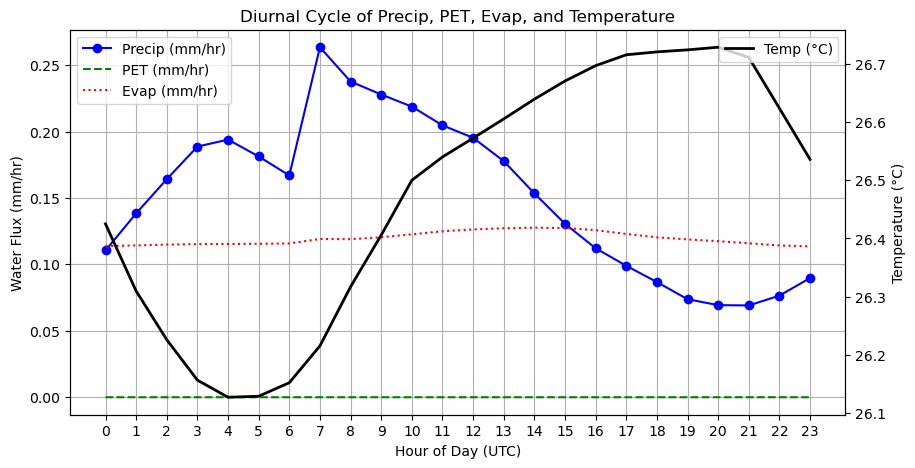

In [4]:


# Load processed NetCDF files
output_dir = "diurnal_results"

# Load datasets with correct variable names
precip = xr.open_dataset(f"{output_dir}/precip_mean.nc")["avg_tprate"].squeeze()
pet = xr.open_dataset(f"{output_dir}/pet_mean.nc")["avg_pevr"].squeeze()
evap = xr.open_dataset(f"{output_dir}/evap_mean.nc")["avg_ie"].squeeze()
temp = xr.open_dataset(f"{output_dir}/temp_mean.nc")["t2m"].squeeze()

# Use "valid_time" instead of "time"
if "valid_time" in precip.coords:
    time = precip.coords["valid_time"].dt.hour
else:
    raise ValueError("Time coordinate 'valid_time' missing from dataset. Check NetCDF file.")

# Create plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Left y-axis for water fluxes
ax1.plot(time, precip, label="Precip (mm/hr)", color="b", marker="o")
ax1.plot(time, pet, label="PET (mm/hr)", color="g", linestyle="--")
ax1.plot(time, evap, label="Evap (mm/hr)", color="r", linestyle=":")

ax1.set_xlabel("Hour of Day (UTC)")
ax1.set_ylabel("Water Flux (mm/hr)")
ax1.set_xticks(range(0, 24,))
ax1.set_title("Diurnal Cycle of Precip, PET, Evap, and Temperature")
ax1.legend(loc="upper left")
ax1.grid(True)

# Right y-axis for temperature
ax2 = ax1.twinx()
ax2.plot(time, temp, label="Temp (°C)", color="k", linewidth=2)
ax2.set_ylabel("Temperature (°C)")
ax2.legend(loc="upper right")

# Show plot
plt.show()


### Modelled Output

In [41]:
Access_CM2 = xr.open_dataset("Simp/pr_Amon_ACCESS-CM2.nc")
Access_CM2

<xarray.Dataset> Size: 219MB
Dimensions:    (time: 1980, bnds: 2, lat: 144, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 16kB 1850-01-16T12:00:00 ... 2014-12-16T...
  * lat        (lat) float64 1kB -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * lon        (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 32kB ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    pr         (time, lat, lon) float32 219MB ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2019-11-08T08:26:37Z
    ...                     ...
    variable_id:            pr
    variant_label:          r1i1p1f1
    version:                v20191108
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/b4dd0f13-6073-4d10-b4e6-7d7a4401e37d
    license:                CMIP6 model data produced by CSIRO is licensed un...

In [42]:
Access_ESM = xr.open_dataset("Simp/pr_Amon_ACCESS-ESM1-5.nc")
Access_ESM

<xarray.Dataset> Size: 221MB
Dimensions:    (time: 1980, bnds: 2, lat: 145, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 16kB 1850-01-16T12:00:00 ... 2014-12-16T...
  * lat        (lat) float64 1kB -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
  * lon        (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 32kB ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    pr         (time, lat, lon) float32 220MB ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  21915.0
    creation_date:          2019-11-15T04:32:57Z
    ...                     ...
    variable_id:            pr
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/e1bc1d0d-54d8-4a7f-adae-d3f6324a2366
    license:                CMIP6 model data produced by CSIRO is licensed un...

In [9]:
%%bash

# Create output directories

mkdir -p modelss

# Define input and output directories
INPUT_DIR="Simp"
OUTPUT_DIR="modelss"

# Define ERA5 resolution
ERA5_RES="r1440x721"

# First process all data to common format before subdomain extraction
echo "Processing precipitation data..."
cdo -remapbil,$ERA5_RES ${INPUT_DIR}/pr_Amon_ACCESS-CM2.nc ${OUTPUT_DIR}/pr_ACCESS-CM2_remap.nc
cdo -remapbil,$ERA5_RES ${INPUT_DIR}/pr_Amon_ACCESS-ESM1-5.nc ${OUTPUT_DIR}/pr_ACCESS-ESM1-5_remap.nc

echo "Processing temperature data..."
cdo -remapbil,$ERA5_RES ${INPUT_DIR}/tas_Amon_ACCESS-CM2_historical.nc ${OUTPUT_DIR}/tas_ACCESS-CM2_remap.nc
cdo -remapbil,$ERA5_RES ${INPUT_DIR}/tas_Amon_ACCESS-ESM1-5_historical.nc ${OUTPUT_DIR}/tas_ACCESS-ESM1-5_remap.nc

# Process precipitation data 
echo "Converting precipitation to mm/day..."
cdo -mulc,86400 ${OUTPUT_DIR}/pr_ACCESS-CM2_remap.nc ${OUTPUT_DIR}/pr_ACCESS-CM2_mmday.nc
cdo -setrtoc,-inf,0,0 -mulc,86400 ${OUTPUT_DIR}/pr_ACCESS-ESM1-5_remap.nc ${OUTPUT_DIR}/pr_ACCESS-ESM1-5_mmday.nc
cdo -mulc,86400 ${INPUT_DIR}/total_precip.nc ${OUTPUT_DIR}/obs_pr_mmday.nc

# Process temperature data
echo "Converting temperature to Celsius..."
cdo -subc,273.15 ${OUTPUT_DIR}/tas_ACCESS-CM2_remap.nc ${OUTPUT_DIR}/tas_ACCESS-CM2_C.nc
cdo -subc,273.15 ${OUTPUT_DIR}/tas_ACCESS-ESM1-5_remap.nc ${OUTPUT_DIR}/tas_ACCESS-ESM1-5_C.nc
cdo -subc,273.15 ${INPUT_DIR}/2m_temp.nc ${OUTPUT_DIR}/obs_tas_C.nc

# Fix latitude orientation in observations
echo "Fixing latitude orientation..."
cdo invertlat ${OUTPUT_DIR}/obs_pr_mmday.nc ${OUTPUT_DIR}/obs_pr_mmday_fixed.nc
cdo invertlat ${OUTPUT_DIR}/obs_tas_C.nc ${OUTPUT_DIR}/obs_tas_C_fixed.nc

# Extract subdomain
echo "Extracting subdomain..."
cdo -sellonlatbox,-1.20,-0.15,6.30,7.30 ${OUTPUT_DIR}/obs_tas_C_fixed.nc ${OUTPUT_DIR}/obs_tas_C_sub.nc
cdo -sellonlatbox,-1.20,-0.15,6.30,7.30 ${OUTPUT_DIR}/obs_pr_mmday_fixed.nc ${OUTPUT_DIR}/obs_pr_mmday_sub.nc
cdo -sellonlatbox,-1.20,-0.15,6.30,7.30 ${OUTPUT_DIR}/tas_ACCESS-CM2_C.nc ${OUTPUT_DIR}/tas_ACCESS-CM2_sub.nc
cdo -sellonlatbox,-1.20,-0.15,6.30,7.30 ${OUTPUT_DIR}/tas_ACCESS-ESM1-5_C.nc ${OUTPUT_DIR}/tas_ACCESS-ESM1-5_sub.nc
cdo -sellonlatbox,-1.20,-0.15,6.30,7.30 ${OUTPUT_DIR}/pr_ACCESS-CM2_mmday.nc ${OUTPUT_DIR}/pr_ACCESS-CM2_mmday_sub.nc
cdo -sellonlatbox,-1.20,-0.15,6.30,7.30 ${OUTPUT_DIR}/pr_ACCESS-ESM1-5_mmday.nc ${OUTPUT_DIR}/pr_ACCESS-ESM1-5_mmday_sub.nc

# Select time period 1981-2010 for subdomain files
echo "Selecting time period 1981-2010..."
cdo -selyear,1981/2010 ${OUTPUT_DIR}/pr_ACCESS-ESM1-5_mmday_sub.nc ${OUTPUT_DIR}/pr_ACCESS-ESM1-5_mmday_subdomain.nc
cdo -selyear,1981/2010 ${OUTPUT_DIR}/pr_ACCESS-CM2_mmday_sub.nc ${OUTPUT_DIR}/pr_ACCESS-CM2_mmday_subdomain.nc
cdo -selyear,1981/2010 ${OUTPUT_DIR}/tas_ACCESS-ESM1-5_sub.nc ${OUTPUT_DIR}/tas_ACCESS-ESM1-5_subdomain.nc
cdo -selyear,1981/2010 ${OUTPUT_DIR}/tas_ACCESS-CM2_sub.nc ${OUTPUT_DIR}/tas_ACCESS-CM2_subdomain.nc

# Calculate climatologies and metrics using subdomain files
echo "Calculating monthly climatologies..."
cdo -ymonmean ${OUTPUT_DIR}/tas_ACCESS-CM2_subdomain.nc ${OUTPUT_DIR}/tas_ACCESS-CM2_ym.nc
cdo -ymonmean ${OUTPUT_DIR}/tas_ACCESS-ESM1-5_subdomain.nc ${OUTPUT_DIR}/tas_ACCESS-ESM1-5_ym.nc
cdo -ymonmean ${OUTPUT_DIR}/pr_ACCESS-CM2_mmday_subdomain.nc ${OUTPUT_DIR}/pr_ACCESS-CM2_ym.nc
cdo -ymonmean ${OUTPUT_DIR}/pr_ACCESS-ESM1-5_mmday_subdomain.nc ${OUTPUT_DIR}/pr_ACCESS-ESM1-5_ym.nc
cdo -ymonmean ${OUTPUT_DIR}/obs_pr_mmday_sub.nc ${OUTPUT_DIR}/obs_pr_ym.nc
cdo -ymonmean ${OUTPUT_DIR}/obs_tas_C_sub.nc ${OUTPUT_DIR}/obs_tas_ym.nc

# First remap observations to model grid for correlation calculation
echo "Remapping observations to model grid..."
cdo -remapbil,${OUTPUT_DIR}/tas_ACCESS-CM2_ym.nc ${OUTPUT_DIR}/obs_tas_ym.nc ${OUTPUT_DIR}/obs_tas_remap_CM2.nc
cdo -remapbil,${OUTPUT_DIR}/tas_ACCESS-ESM1-5_ym.nc ${OUTPUT_DIR}/obs_tas_ym.nc ${OUTPUT_DIR}/obs_tas_remap_ESM1-5.nc
cdo -remapbil,${OUTPUT_DIR}/pr_ACCESS-CM2_ym.nc ${OUTPUT_DIR}/obs_pr_ym.nc ${OUTPUT_DIR}/obs_pr_remap_CM2.nc
cdo -remapbil,${OUTPUT_DIR}/pr_ACCESS-ESM1-5_ym.nc ${OUTPUT_DIR}/obs_pr_ym.nc ${OUTPUT_DIR}/obs_pr_remap_ESM1-5.nc

# Calculate spatial correlations
echo "Calculating spatial correlations..."
cdo -fldcor ${OUTPUT_DIR}/tas_ACCESS-CM2_ym.nc ${OUTPUT_DIR}/obs_tas_remap_CM2.nc ${OUTPUT_DIR}/tas_ACCESS-CM2_corr.nc
cdo -fldcor ${OUTPUT_DIR}/tas_ACCESS-ESM1-5_ym.nc ${OUTPUT_DIR}/obs_tas_remap_ESM1-5.nc ${OUTPUT_DIR}/tas_ACCESS-ESM1-5_corr.nc
cdo -fldcor ${OUTPUT_DIR}/pr_ACCESS-CM2_ym.nc ${OUTPUT_DIR}/obs_pr_remap_CM2.nc ${OUTPUT_DIR}/pr_ACCESS-CM2_corr.nc
cdo -fldcor ${OUTPUT_DIR}/pr_ACCESS-ESM1-5_ym.nc ${OUTPUT_DIR}/obs_pr_remap_ESM1-5.nc ${OUTPUT_DIR}/pr_ACCESS-ESM1-5_corr.nc

# Calculate biases
echo "Calculating biases..."
cdo -sub ${OUTPUT_DIR}/tas_ACCESS-CM2_ym.nc ${OUTPUT_DIR}/obs_tas_remap_CM2.nc ${OUTPUT_DIR}/tas_ACCESS-CM2_bias.nc
cdo -sub ${OUTPUT_DIR}/tas_ACCESS-ESM1-5_ym.nc ${OUTPUT_DIR}/obs_tas_remap_ESM1-5.nc ${OUTPUT_DIR}/tas_ACCESS-ESM1-5_bias.nc
cdo -sub ${OUTPUT_DIR}/pr_ACCESS-CM2_ym.nc ${OUTPUT_DIR}/obs_pr_remap_CM2.nc ${OUTPUT_DIR}/pr_ACCESS-CM2_bias.nc
cdo -sub ${OUTPUT_DIR}/pr_ACCESS-ESM1-5_ym.nc ${OUTPUT_DIR}/obs_pr_remap_ESM1-5.nc ${OUTPUT_DIR}/pr_ACCESS-ESM1-5_bias.nc

echo "Processing complete. Output files are in ${OUTPUT_DIR}/ directory."

Processing precipitation data...
cdo    remapbil: Bilinear weights from lonlat (192x144) to lonlat (1440x721) grid
cdo    remapbil: Bilinear weights from lonlat (192x145) to lonlat (1440x721) grid
Processing temperature data...
cdo    remapbil: Bilinear weights from lonlat (192x144) to lonlat (1440x721) grid
cdo    remapbil: Bilinear weights from lonlat (192x145) to lonlat (1440x721) grid
Converting precipitation to mm/day...


cdi  warning (cdfInqContents): Coordinates variable number can't be assigned!
ntents): Coordinates variable expver can't be assigned!


Converting temperature to Celsius...


cdi  warning (cdfInqContents): Coordinates variable number can't be assigned!
ntents): Coordinates variable expver can't be assigned!


Fixing latitude orientation...
Extracting subdomain...
Selecting time period 1981-2010...
Calculating monthly climatologies...
Remapping observations to model grid...
cdo    remapbil: Bilinear weights from lonlat (4x4) to lonlat (4x4) grid
cdo    remapbil: Bilinear weights from lonlat (4x4) to lonlat (4x4) grid
cdo    remapbil: Bilinear weights from lonlat (4x4) to lonlat (4x4) grid
cdo    remapbil: Bilinear weights from lonlat (4x4) to lonlat (4x4) grid
Calculating spatial correlations...


cdo    fldcor (Warning): Input parameters have different levels!
cdo    fldcor (Warning): Input parameters have different levels!


Calculating biases...


cdo    sub (Warning): Input parameters have different levels!
cdo    sub (Warning): Input parameters have different levels!


Processing complete. Output files are in modelss/ directory.



Processing precipitation...
Error in spatial comparison plot: DataArray must be 2d


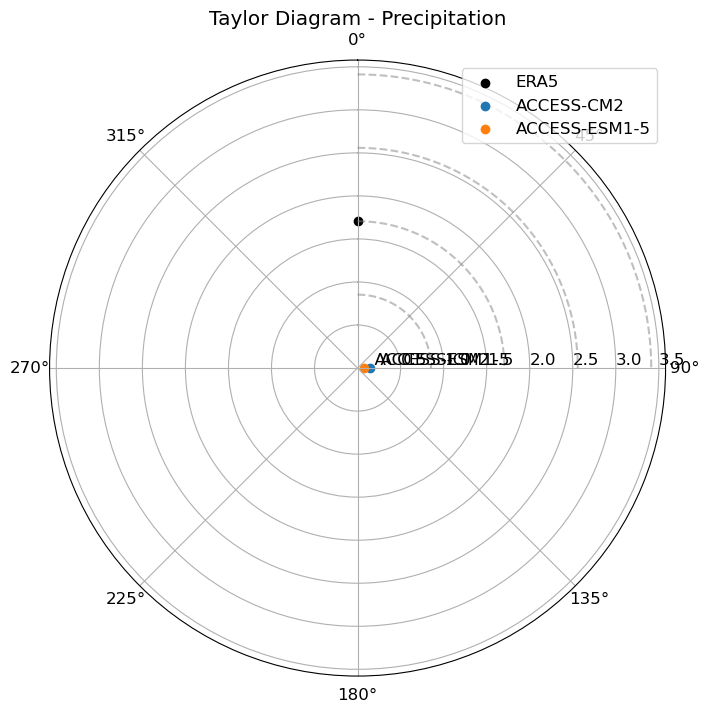

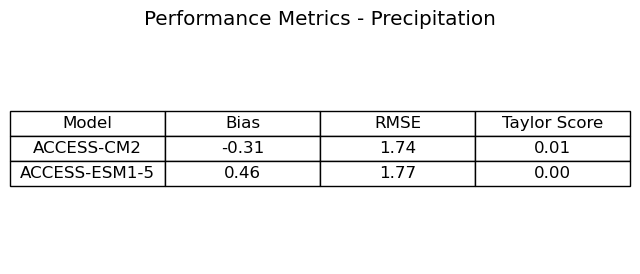


Precipitation Metrics:
ACCESS-CM2:
  Bias: -0.31
  RMSE: 1.74
  Taylor Score: 0.01

ACCESS-ESM1-5:
  Bias: 0.46
  RMSE: 1.77
  Taylor Score: 0.00


Processing temperature...
Error in spatial comparison plot: DataArray must be 2d


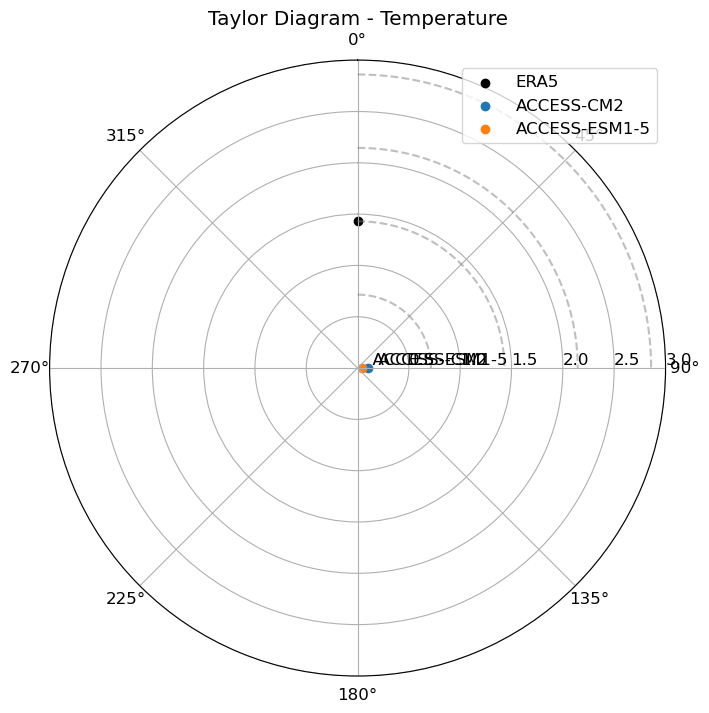

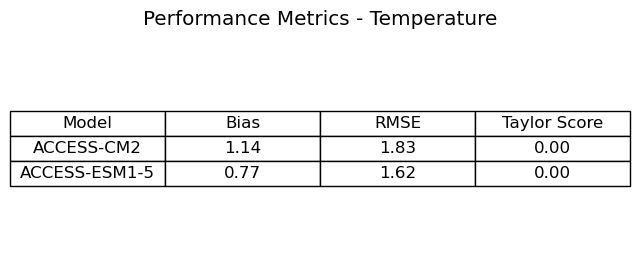


Temperature Metrics:
ACCESS-CM2:
  Bias: 1.14
  RMSE: 1.83
  Taylor Score: 0.00

ACCESS-ESM1-5:
  Bias: 0.77
  RMSE: 1.62
  Taylor Score: 0.00


All plots saved to plots


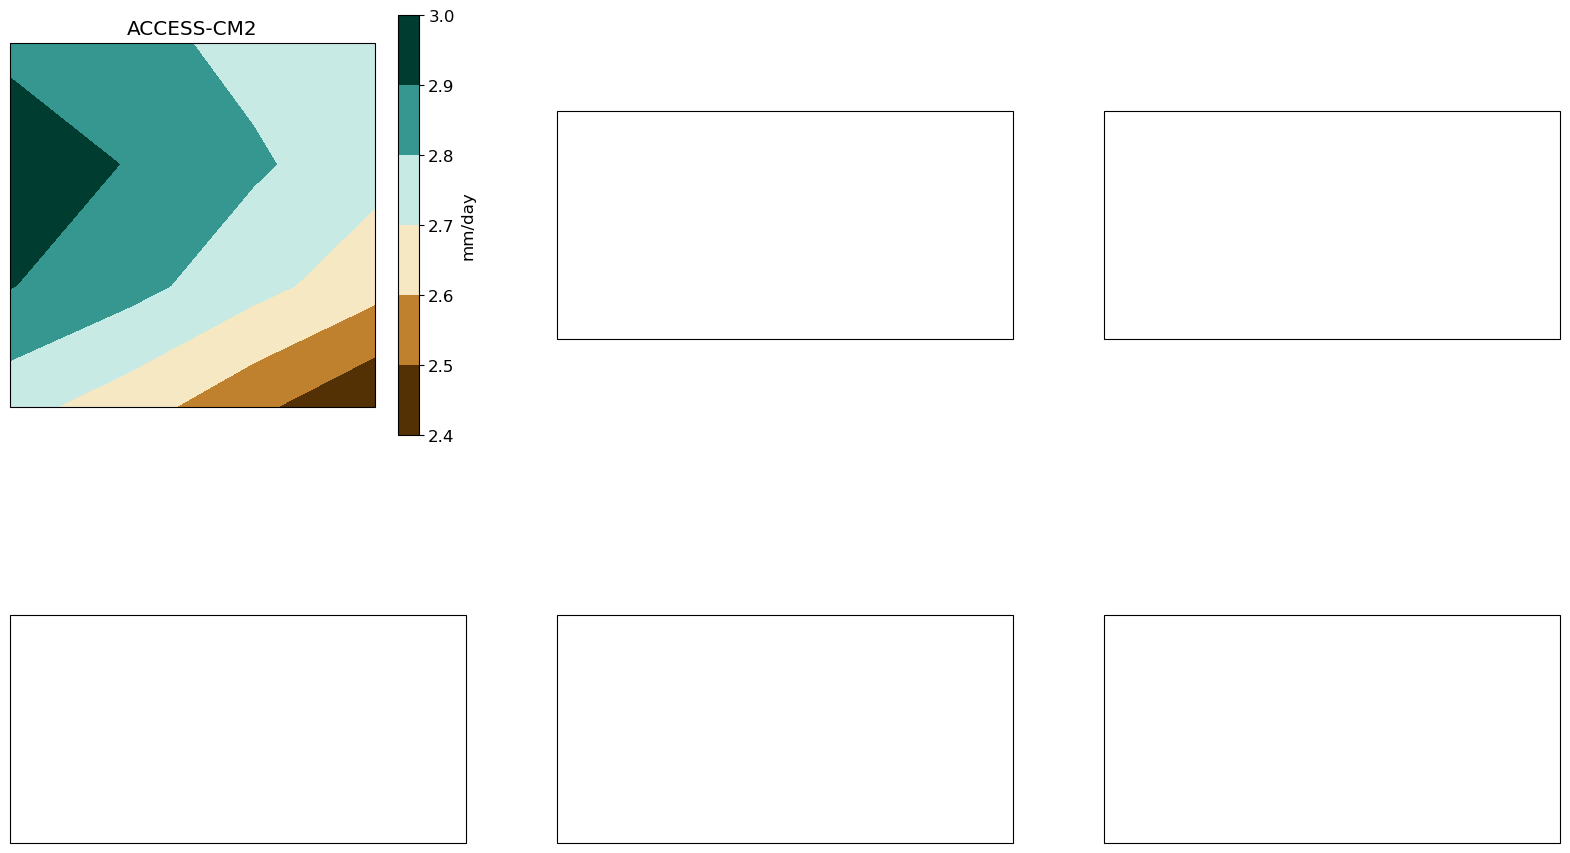

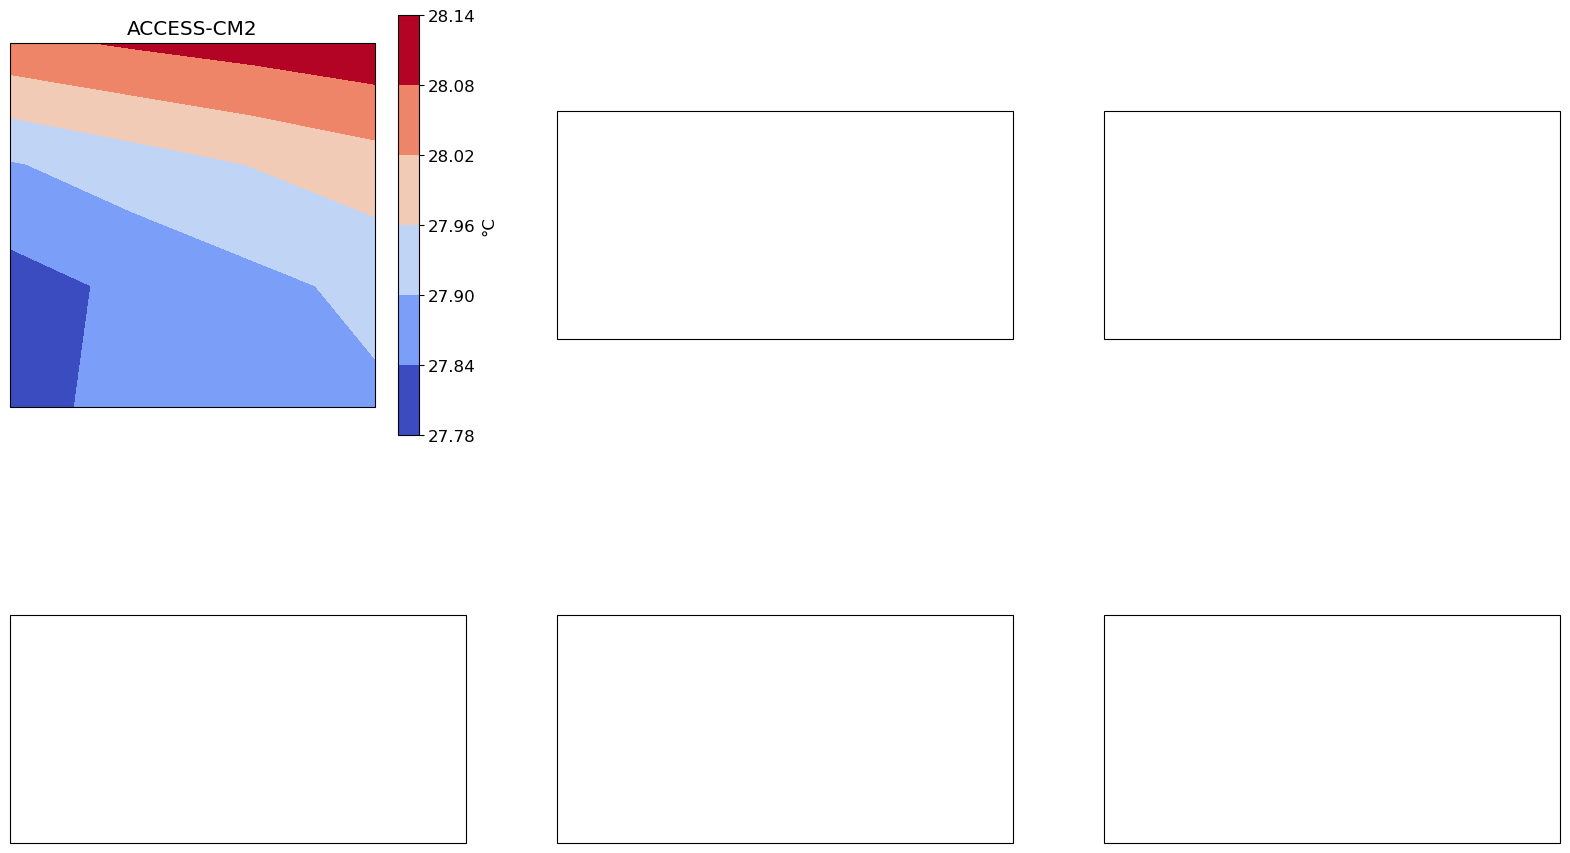

In [16]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import TwoSlopeNorm
import os
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from IPython.display import display

# Set paths
output_dir = "modelss"
plot_dir = "plots"
os.makedirs(plot_dir, exist_ok=True)

# Custom plot settings
plt.rcParams.update({'font.size': 12})

# Colormaps
PRECIP_CMAP = 'BrBG'
TEMP_CMAP = 'coolwarm'
BIAS_CMAP = 'RdBu_r'
CORR_CMAP = 'RdYlBu_r'

# Variable names in observation files
OBS_VAR_NAMES = {
    'precipitation': 'avg_tprate',
    'temperature': 't2m'
}

def prepare_2d_data(da):
    """Ensure data is 2D by taking mean over time if needed"""
    if 'time' in da.dims:
        da = da.mean(dim='time', skipna=True)
    if 'lev' in da.dims:
        da = da.isel(lev=0)  # Take first level if exists
    return da.squeeze()

def calculate_metrics(model_data, obs_data):
    """Calculate RMSE, bias, and Taylor skill score"""
    try:
        # Ensure same grid and dimensions
        model_data = model_data.interp_like(obs_data)
        model_data = prepare_2d_data(model_data)
        obs_data = prepare_2d_data(obs_data)
        
        # Calculate metrics
        bias = float((model_data - obs_data).mean())
        rmse = float(np.sqrt(((model_data - obs_data)**2).mean()))
        
        # Taylor skill score (1 is perfect)
        std_model = float(model_data.std())
        std_obs = float(obs_data.std())
        correlation = float(xr.corr(model_data, obs_data))
        taylor_score = (4*(1 + correlation)**4) / ((std_model/std_obs + std_obs/std_model)**2 * (1 + 1)**2)
        
        return bias, rmse, taylor_score
    except Exception as e:
        print(f"Error calculating metrics: {str(e)}")
        return np.nan, np.nan, np.nan

def plot_spatial_comparison(models, variable_type):
    """Plot model vs observations spatial comparison"""
    try:
        var = 'pr' if variable_type == 'precipitation' else 'tas'
        obs_var_name = OBS_VAR_NAMES[variable_type]
        units = 'mm/day' if variable_type == 'precipitation' else '°C'
        
        # Load data
        obs_ds = xr.open_dataset(f"{output_dir}/obs_{'pr' if variable_type == 'precipitation' else 'tas'}_ym.nc")
        obs = obs_ds[obs_var_name]
        obs = prepare_2d_data(obs)
        
        fig, axes = plt.subplots(2, 3, figsize=(20, 12),
                               subplot_kw={'projection': ccrs.PlateCarree()})
        
        for i, model in enumerate(models):
            # Load and prepare model data
            ds = xr.open_dataset(f"{output_dir}/{var}_{model}_ym.nc")
            model_data = ds[var]
            model_data = prepare_2d_data(model_data)
            
            # Plot model
            model_data.plot.contourf(ax=axes[0,i], transform=ccrs.PlateCarree(),
                                  cmap=PRECIP_CMAP if variable_type == 'precipitation' else TEMP_CMAP,
                                  cbar_kwargs={'label': units})
            axes[0,i].set_title(f"{model}")
            axes[0,i].coastlines()
            axes[0,i].add_feature(cfeature.LAND, facecolor='lightgray')
            
            # Plot bias
            bias = model_data - obs
            bias.plot.contourf(ax=axes[1,i], transform=ccrs.PlateCarree(),
                             cmap=BIAS_CMAP, levels=21,
                             cbar_kwargs={'label': f'Bias ({units})'})
            axes[1,i].set_title(f"{model} Bias")
            axes[1,i].coastlines()
            axes[1,i].add_feature(cfeature.LAND, facecolor='lightgray')
        
        # Plot observations in last column
        obs.plot.contourf(ax=axes[0,2], transform=ccrs.PlateCarree(),
                        cmap=PRECIP_CMAP if variable_type == 'precipitation' else TEMP_CMAP,
                        cbar_kwargs={'label': units})
        axes[0,2].set_title("ERA5 Observations")
        axes[0,2].coastlines()
        axes[0,2].add_feature(cfeature.LAND, facecolor='lightgray')
        axes[1,2].axis('off')
        
        plt.tight_layout()
        display(fig)
        plt.savefig(f"{plot_dir}/{variable_type}_spatial_comparison.png", bbox_inches='tight', dpi=300)
        plt.close()
    except Exception as e:
        print(f"Error in spatial comparison plot: {str(e)}")

def plot_taylor_diagram(models, variable_type):
    """Create Taylor diagram comparing models"""
    try:
        var = 'pr' if variable_type == 'precipitation' else 'tas'
        obs_var_name = OBS_VAR_NAMES[variable_type]
        
        # Load observations
        obs_ds = xr.open_dataset(f"{output_dir}/obs_{'pr' if variable_type == 'precipitation' else 'tas'}_ym.nc")
        obs = obs_ds[obs_var_name]
        obs = prepare_2d_data(obs)
        std_obs = float(obs.std())
        
        # Calculate metrics
        metrics = {}
        for model in models:
            ds = xr.open_dataset(f"{output_dir}/{var}_{model}_ym.nc")
            model_data = ds[var]
            model_data = prepare_2d_data(model_data.interp_like(obs))
            
            std_model = float(model_data.std())
            correlation = float(xr.corr(model_data, obs))
            metrics[model] = (std_model, correlation)
        
        # Create Taylor diagram
        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111, projection='polar')
        
        # Reference point
        ax.scatter(0, std_obs, color='k', label='ERA5')
        
        # Plot models
        colors = ['#1f77b4', '#ff7f0e']
        for (model, (std, corr)), color in zip(metrics.items(), colors):
            angle = np.arccos(corr)
            ax.scatter(angle, std, color=color, label=model)
            ax.text(angle, std, f"  {model}", verticalalignment='bottom')
        
        # Add RMS circles and radial grid
        rms_contours = [0.5, 1, 1.5, 2]
        for r in rms_contours:
            ax.plot(np.linspace(0, np.pi/2, 100), [r*std_obs]*100, '--', color='gray', alpha=0.5)
        
        ax.set_theta_zero_location("N")
        ax.set_theta_direction(-1)
        ax.set_rlabel_position(90)
        ax.set_title(f"Taylor Diagram - {variable_type.capitalize()}")
        ax.legend(loc='upper right')
        
        display(fig)
        plt.savefig(f"{plot_dir}/{variable_type}_taylor_diagram.png", bbox_inches='tight', dpi=300)
        plt.close()
    except Exception as e:
        print(f"Error in Taylor diagram: {str(e)}")

def plot_metrics_table(models, variable_type):
    """Create table with RMSE, bias and Taylor score"""
    try:
        var = 'pr' if variable_type == 'precipitation' else 'tas'
        obs_var_name = OBS_VAR_NAMES[variable_type]
        
        # Load observations
        obs_ds = xr.open_dataset(f"{output_dir}/obs_{'pr' if variable_type == 'precipitation' else 'tas'}_ym.nc")
        obs = obs_ds[obs_var_name]
        obs = prepare_2d_data(obs)
        
        # Calculate metrics
        data = []
        for model in models:
            ds = xr.open_dataset(f"{output_dir}/{var}_{model}_ym.nc")
            model_data = ds[var]
            model_data = prepare_2d_data(model_data.interp_like(obs))
            
            bias, rmse, taylor = calculate_metrics(model_data, obs)
            data.append([model, f"{bias:.2f}", f"{rmse:.2f}", f"{taylor:.2f}"])
        
        # Create table plot
        fig, ax = plt.subplots(figsize=(8, 3))
        ax.axis('off')
        
        columns = ['Model', 'Bias', 'RMSE', 'Taylor Score']
        table = ax.table(cellText=data,
                        colLabels=columns,
                        loc='center',
                        cellLoc='center')
        
        table.auto_set_font_size(False)
        table.set_fontsize(12)
        table.scale(1, 1.5)
        
        plt.title(f"Performance Metrics - {variable_type.capitalize()}")
        display(fig)
        plt.savefig(f"{plot_dir}/{variable_type}_metrics_table.png", bbox_inches='tight', dpi=300)
        plt.close()
    except Exception as e:
        print(f"Error in metrics table: {str(e)}")

def main():
    models = ['ACCESS-CM2', 'ACCESS-ESM1-5']
    
    for variable_type in ['precipitation', 'temperature']:
        print(f"\nProcessing {variable_type}...")
        
        # Create plots
        plot_spatial_comparison(models, variable_type)
        plot_taylor_diagram(models, variable_type)
        plot_metrics_table(models, variable_type)
        
        # Print metrics to console
        print(f"\n{variable_type.capitalize()} Metrics:")
        var = 'pr' if variable_type == 'precipitation' else 'tas'
        obs_var_name = OBS_VAR_NAMES[variable_type]
        
        try:
            obs_ds = xr.open_dataset(f"{output_dir}/obs_{'pr' if variable_type == 'precipitation' else 'tas'}_ym.nc")
            obs = obs_ds[obs_var_name]
            obs = prepare_2d_data(obs)
            
            for model in models:
                ds = xr.open_dataset(f"{output_dir}/{var}_{model}_ym.nc")
                model_data = ds[var]
                model_data = prepare_2d_data(model_data.interp_like(obs))
                
                bias, rmse, taylor = calculate_metrics(model_data, obs)
                print(f"{model}:")
                print(f"  Bias: {bias:.2f}")
                print(f"  RMSE: {rmse:.2f}")
                print(f"  Taylor Score: {taylor:.2f}\n")
        except Exception as e:
            print(f"Error calculating metrics: {str(e)}")

    print(f"\nAll plots saved to {plot_dir}")

if __name__ == "__main__":
    main()

Plotting monthly correlation time series...
Error plotting monthly correlation: list index out of range
Error plotting monthly correlation: list index out of range

Plotting monthly bias time series...
Error plotting monthly bias: x and y can be no greater than 2D, but have shapes (12,) and (12, 4, 4)
Error plotting monthly bias: x and y can be no greater than 2D, but have shapes (12,) and (12, 4, 4)


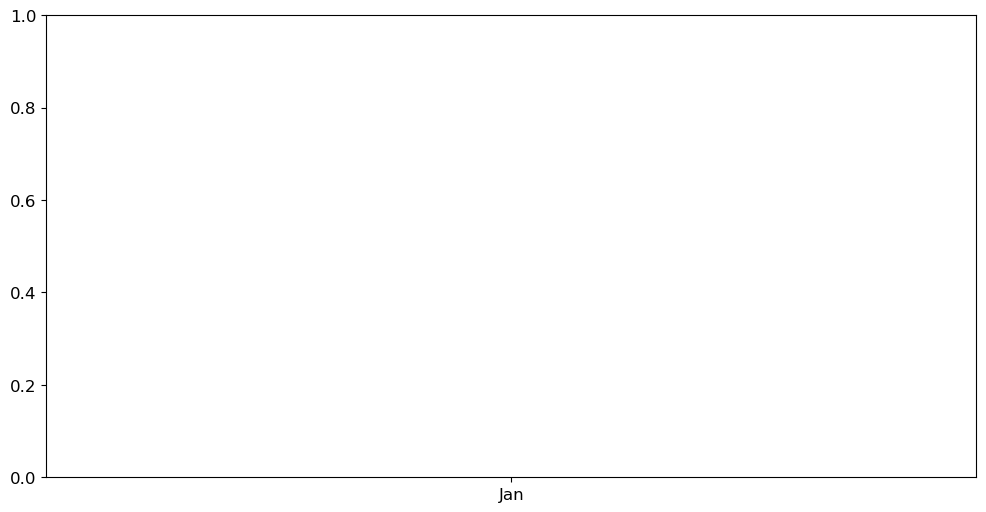

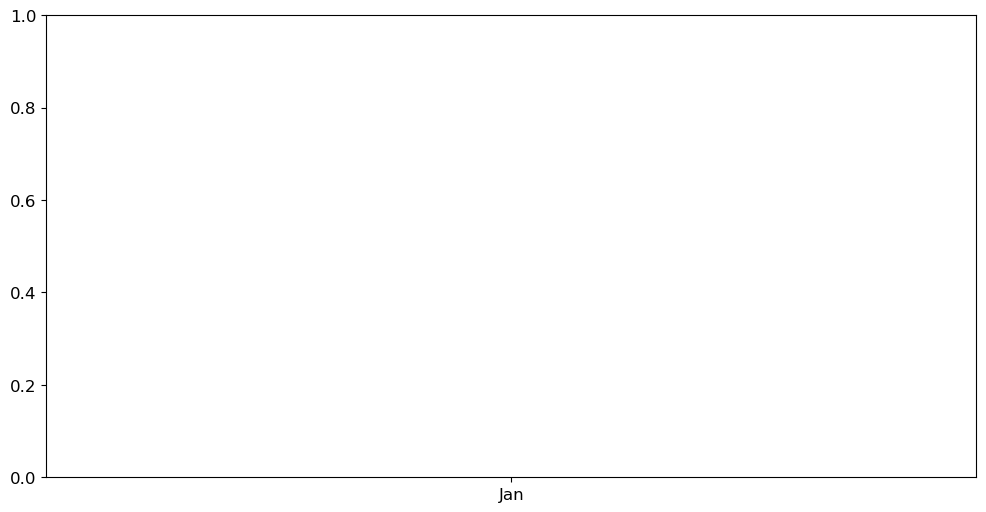

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from IPython.display import display

# Set paths
output_dir = "modelss"
plot_dir = "plots/monthly_timeseries"
os.makedirs(plot_dir, exist_ok=True)

# Custom plot settings
plt.rcParams.update({'font.size': 12})

# Colors for models
MODEL_COLORS = {
    'ACCESS-CM2': '#1f77b4',
    'ACCESS-ESM1-5': '#ff7f0e',
    'ERA5': '#2ca02c'
}

def plot_monthly_correlation_timeseries(variable):
    """Plot monthly correlation time series from Jan to Dec"""
    try:
        # Load correlation data
        cm2_corr = xr.open_dataset(f"{output_dir}/{variable}_ACCESS-CM2_corr.nc")
        esm_corr = xr.open_dataset(f"{output_dir}/{variable}_ACCESS-ESM1-5_corr.nc")
        
        # Get the correlation variable (may have different names)
        corr_var_cm2 = [v for v in cm2_corr.data_vars if 'corr' in v.lower()][0]
        corr_var_esm = [v for v in esm_corr.data_vars if 'corr' in v.lower()][0]
        
        # Create figure
        fig, ax = plt.subplots(figsize=(12, 6))
        
        # Plot monthly values
        months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        
        # ACCESS-CM2
        ax.plot(months, cm2_corr[corr_var_cm2].values, 
                color=MODEL_COLORS['ACCESS-CM2'], 
                marker='o', linestyle='-', linewidth=2,
                label='ACCESS-CM2')
        
        # ACCESS-ESM1-5
        ax.plot(months, esm_corr[corr_var_esm].values,
                color=MODEL_COLORS['ACCESS-ESM1-5'],
                marker='s', linestyle='-', linewidth=2,
                label='ACCESS-ESM1-5')
        
        # Customize plot
        title = f"Monthly Correlation with ERA5 ({'Precipitation' if variable == 'pr' else 'Temperature'})"
        ax.set_title(title)
        ax.set_xlabel('Month')
        ax.set_ylabel('Correlation Coefficient')
        ax.set_ylim(-1, 1)
        ax.axhline(0, color='gray', linestyle='--')
        ax.grid(True, alpha=0.3)
        ax.legend()
        
        plt.tight_layout()
        plt.savefig(f"{plot_dir}/{variable}_monthly_correlation.png", dpi=300)
        plt.show()
        
    except Exception as e:
        print(f"Error plotting monthly correlation: {str(e)}")

def plot_monthly_bias_timeseries(variable):
    """Plot monthly bias time series from Jan to Dec"""
    try:
        # Load bias data
        cm2_bias = xr.open_dataset(f"{output_dir}/{variable}_ACCESS-CM2_bias.nc")
        esm_bias = xr.open_dataset(f"{output_dir}/{variable}_ACCESS-ESM1-5_bias.nc")
        
        # Get the bias variable
        bias_var_cm2 = [v for v in cm2_bias.data_vars if 'bias' in v.lower() or v in ['tas', 'pr']][0]
        bias_var_esm = [v for v in esm_bias.data_vars if 'bias' in v.lower() or v in ['tas', 'pr']][0]
        
        # Create figure
        fig, ax = plt.subplots(figsize=(12, 6))
        
        # Plot monthly values
        months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        
        # ACCESS-CM2
        ax.plot(months, cm2_bias[bias_var_cm2].values,
                color=MODEL_COLORS['ACCESS-CM2'],
                marker='o', linestyle='-', linewidth=2,
                label='ACCESS-CM2')
        
        # ACCESS-ESM1-5
        ax.plot(months, esm_bias[bias_var_esm].values,
                color=MODEL_COLORS['ACCESS-ESM1-5'],
                marker='s', linestyle='-', linewidth=2,
                label='ACCESS-ESM1-5')
        
        # Customize plot
        units = 'mm/day' if variable == 'pr' else '°C'
        title = f"Monthly Bias vs ERA5 ({'Precipitation' if variable == 'pr' else 'Temperature'})"
        ax.set_title(title)
        ax.set_xlabel('Month')
        ax.set_ylabel(f'Bias ({units})')
        ax.axhline(0, color='gray', linestyle='--')
        ax.grid(True, alpha=0.3)
        ax.legend()
        
        plt.tight_layout()
        plt.savefig(f"{plot_dir}/{variable}_monthly_bias.png", dpi=300)
        plt.show()
        
    except Exception as e:
        print(f"Error plotting monthly bias: {str(e)}")

def main():
    # Plot for both variables
    print("Plotting monthly correlation time series...")
    plot_monthly_correlation_timeseries('pr')
    plot_monthly_correlation_timeseries('tas')
    
    print("\nPlotting monthly bias time series...")
    plot_monthly_bias_timeseries('pr')
    plot_monthly_bias_timeseries('tas')

if __name__ == "__main__":
    main()

### cdo remapbil,r360*720 GPCP
cdo remapbil,r720*1440 ERA5
cdo sub mod.nc obs.c outfile.nc

in your  presentation a slide to talk about the model, differrences , advatages

Zonal mean for solar radiation and temperature
Cloud cover is within (0 -1) * 100, which is the percentage. Because they are usually between  0 and 1
100 -200 hpa high clouds
500 -700 hPa mid clouds
1000 hpa low clouds
cdodiv,100 output hpa_oyt.nc

use the Talyor skill score to check for RMSE,Corr, Bias using the Taylor diagram
Do for cloud cover global and also do for ,diurnal, annual , vertical profiles

add diurnal cycle of the modells too

In [2]:
%%bash

# Create output directory
mkdir -p model_trial

# Define input and output directories
INPUT_DIR="Simp"
OUTPUT_DIR="model_trial"

# chmod 755 model_obs
chmod 755 model_trial

# Define ERA5 resolution
ERA5_RES="r1440x721"

# remap all model data to ERA5 resolution before processing

# Precipitation data
cdo -remapbil,$ERA5_RES ${INPUT_DIR}/pr_Amon_ACCESS-CM2.nc ${OUTPUT_DIR}/pr_ACCESS-CM2_remap.nc
cdo -remapbil,$ERA5_RES ${INPUT_DIR}/pr_Amon_ACCESS-ESM1-5.nc ${OUTPUT_DIR}/pr_ACCESS-ESM1-5_remap.nc

# Temperature data
cdo -remapbil,$ERA5_RES ${INPUT_DIR}/tas_Amon_ACCESS-CM2_historical.nc ${OUTPUT_DIR}/tas_ACCESS-CM2_remap.nc
cdo -remapbil,$ERA5_RES ${INPUT_DIR}/tas_Amon_ACCESS-ESM1-5_historical.nc ${OUTPUT_DIR}/tas_ACCESS-ESM1-5_remap.nc

# Process precipitation data 

# Convert ACCESS-CM2 precipitation from kg m-2 s-1 to mm/day
cdo -mulc,86400 ${OUTPUT_DIR}/pr_ACCESS-CM2_remap.nc ${OUTPUT_DIR}/pr_ACCESS-CM2_mmday.nc

# Convert ACCESS-ESM1-5 precipitation (handle negative values)
cdo -setrtoc,-inf,0,0 -mulc,86400 ${OUTPUT_DIR}/pr_ACCESS-ESM1-5_remap.nc ${OUTPUT_DIR}/pr_ACCESS-ESM1-5_mmday.nc

# Convert observed precipitation 
cdo -mulc,86400 ${INPUT_DIR}/total_precip.nc ${OUTPUT_DIR}/obs_pr_mmday.nc

# Process temperature data

# Convert temperature from Kelvin to Celsius
cdo -subc,273.15 ${OUTPUT_DIR}/tas_ACCESS-CM2_remap.nc ${OUTPUT_DIR}/tas_ACCESS-CM2_C.nc
cdo -subc,273.15 ${OUTPUT_DIR}/tas_ACCESS-ESM1-5_remap.nc ${OUTPUT_DIR}/tas_ACCESS-ESM1-5_C.nc

# Convert observed temperature
cdo -subc,273.15 ${INPUT_DIR}/2m_temp.nc ${OUTPUT_DIR}/obs_tas_C.nc

# Select time period 1981-2010 for MODEL DATA 

# Precipitation
cdo -selyear,1981/2010 ${OUTPUT_DIR}/pr_ACCESS-CM2_mmday.nc ${OUTPUT_DIR}/pr_ACCESS-CM2_1981-2010_mmday.nc
cdo -selyear,1981/2010 ${OUTPUT_DIR}/pr_ACCESS-ESM1-5_mmday.nc ${OUTPUT_DIR}/pr_ACCESS-ESM1-5_1981-2010_mmday.nc

# Temperature
cdo -selyear,1981/2010 ${OUTPUT_DIR}/tas_ACCESS-CM2_C.nc ${OUTPUT_DIR}/tas_ACCESS-CM2_1981-2010_C.nc
cdo -selyear,1981/2010 ${OUTPUT_DIR}/tas_ACCESS-ESM1-5_C.nc ${OUTPUT_DIR}/tas_ACCESS-ESM1-5_1981-2010_C.nc

# Fix latitude orientation in observations
cdo invertlat ${OUTPUT_DIR}/obs_pr_mmday.nc ${OUTPUT_DIR}/obs_pr_mmday_fixed.nc
cdo invertlat ${OUTPUT_DIR}/obs_tas_C.nc ${OUTPUT_DIR}/obs_tas_C_fixed.nc

# Re-generate observation climatologies using fixed files
cdo -yearmean ${OUTPUT_DIR}/obs_pr_mmday_fixed.nc ${OUTPUT_DIR}/obs_pr_yrclim_mmday.nc
cdo -yearmean ${OUTPUT_DIR}/obs_tas_C_fixed.nc ${OUTPUT_DIR}/obs_tas_yrclim_C.nc

# Calculate climatological means (monthly and annual)

# yearly climatology 
cdo -yearmean ${OUTPUT_DIR}/pr_ACCESS-CM2_1981-2010_mmday.nc ${OUTPUT_DIR}/pr_ACCESS-CM2_yrclim_mmday.nc
cdo -yearmean ${OUTPUT_DIR}/pr_ACCESS-ESM1-5_1981-2010_mmday.nc ${OUTPUT_DIR}/pr_ACCESS-ESM1-5_yrclim_mmday.nc

cdo -yearmean ${OUTPUT_DIR}/tas_ACCESS-CM2_1981-2010_C.nc ${OUTPUT_DIR}/tas_ACCESS-CM2_yrclim_C.nc
cdo -yearmean ${OUTPUT_DIR}/tas_ACCESS-ESM1-5_1981-2010_C.nc ${OUTPUT_DIR}/tas_ACCESS-ESM1-5_yrclim_C.nc

# Annual climatology (timmean of monthly climatology)
cdo -timmean ${OUTPUT_DIR}/pr_ACCESS-CM2_yrclim_mmday.nc ${OUTPUT_DIR}/pr_ACCESS-CM2_annclim_mmday.nc
cdo -timmean ${OUTPUT_DIR}/pr_ACCESS-ESM1-5_yrclim_mmday.nc ${OUTPUT_DIR}/pr_ACCESS-ESM1-5_annclim_mmday.nc
cdo -timmean ${OUTPUT_DIR}/obs_pr_yrclim_mmday.nc ${OUTPUT_DIR}/obs_pr_annclim_mmday.nc

cdo -timmean ${OUTPUT_DIR}/tas_ACCESS-CM2_yrclim_C.nc ${OUTPUT_DIR}/tas_ACCESS-CM2_annclim_C.nc
cdo -timmean ${OUTPUT_DIR}/tas_ACCESS-ESM1-5_yrclim_C.nc ${OUTPUT_DIR}/tas_ACCESS-ESM1-5_annclim_C.nc
cdo -timmean ${OUTPUT_DIR}/obs_tas_yrclim_C.nc ${OUTPUT_DIR}/obs_tas_annclim_C.nc

# Calculate Bias (Model - Observed)

# yearly bias - using fixed observation files
cdo -sub ${OUTPUT_DIR}/pr_ACCESS-CM2_yrclim_mmday.nc ${OUTPUT_DIR}/obs_pr_yrclim_mmday.nc ${OUTPUT_DIR}/pr_ACCESS-CM2_yrbias_mmday.nc
cdo -sub ${OUTPUT_DIR}/pr_ACCESS-ESM1-5_yrclim_mmday.nc ${OUTPUT_DIR}/obs_pr_yrclim_mmday.nc ${OUTPUT_DIR}/pr_ACCESS-ESM1-5_yrbias_mmday.nc

cdo -sub ${OUTPUT_DIR}/tas_ACCESS-CM2_yrclim_C.nc ${OUTPUT_DIR}/obs_tas_yrclim_C.nc ${OUTPUT_DIR}/tas_ACCESS-CM2_yrbias_C.nc
cdo -sub ${OUTPUT_DIR}/tas_ACCESS-ESM1-5_yrclim_C.nc ${OUTPUT_DIR}/obs_tas_yrclim_C.nc ${OUTPUT_DIR}/tas_ACCESS-ESM1-5_yrbias_C.nc

# Annual bias
cdo -sub ${OUTPUT_DIR}/pr_ACCESS-CM2_annclim_mmday.nc ${OUTPUT_DIR}/obs_pr_annclim_mmday.nc ${OUTPUT_DIR}/pr_ACCESS-CM2_annbias_mmday.nc
cdo -sub ${OUTPUT_DIR}/pr_ACCESS-ESM1-5_annclim_mmday.nc ${OUTPUT_DIR}/obs_pr_annclim_mmday.nc ${OUTPUT_DIR}/pr_ACCESS-ESM1-5_annbias_mmday.nc

cdo -sub ${OUTPUT_DIR}/tas_ACCESS-CM2_annclim_C.nc ${OUTPUT_DIR}/obs_tas_annclim_C.nc ${OUTPUT_DIR}/tas_ACCESS-CM2_annbias_C.nc
cdo -sub ${OUTPUT_DIR}/tas_ACCESS-ESM1-5_annclim_C.nc ${OUTPUT_DIR}/obs_tas_annclim_C.nc ${OUTPUT_DIR}/tas_ACCESS-ESM1-5_annbias_C.nc

# Calculate Correlation 

# First remap observations to model grid for correlation calculation
cdo -remapbil,${OUTPUT_DIR}/pr_ACCESS-CM2_1981-2010_mmday.nc ${OUTPUT_DIR}/obs_pr_mmday_fixed.nc ${OUTPUT_DIR}/obs_pr_remap_ACCESS-CM2_mmday.nc
cdo -remapbil,${OUTPUT_DIR}/pr_ACCESS-ESM1-5_1981-2010_mmday.nc ${OUTPUT_DIR}/obs_pr_mmday_fixed.nc ${OUTPUT_DIR}/obs_pr_remap_ACCESS-ESM1-5_mmday.nc

cdo -remapbil,${OUTPUT_DIR}/tas_ACCESS-CM2_1981-2010_C.nc ${OUTPUT_DIR}/obs_tas_C_fixed.nc ${OUTPUT_DIR}/obs_tas_remap_ACCESS-CM2_C.nc
cdo -remapbil,${OUTPUT_DIR}/tas_ACCESS-ESM1-5_1981-2010_C.nc ${OUTPUT_DIR}/obs_tas_C_fixed.nc ${OUTPUT_DIR}/obs_tas_remap_ACCESS-ESM1-5_C.nc

# Temporal correlation for full time series
cdo -timcor ${OUTPUT_DIR}/pr_ACCESS-CM2_1981-2010_mmday.nc ${OUTPUT_DIR}/obs_pr_remap_ACCESS-CM2_mmday.nc ${OUTPUT_DIR}/pr_ACCESS-CM2_correlation.nc
cdo -timcor ${OUTPUT_DIR}/pr_ACCESS-ESM1-5_1981-2010_mmday.nc ${OUTPUT_DIR}/obs_pr_remap_ACCESS-ESM1-5_mmday.nc ${OUTPUT_DIR}/pr_ACCESS-ESM1-5_correlation.nc

cdo -timcor ${OUTPUT_DIR}/tas_ACCESS-CM2_1981-2010_C.nc ${OUTPUT_DIR}/obs_tas_remap_ACCESS-CM2_C.nc ${OUTPUT_DIR}/tas_ACCESS-CM2_correlation.nc
cdo -timcor ${OUTPUT_DIR}/tas_ACCESS-ESM1-5_1981-2010_C.nc ${OUTPUT_DIR}/obs_tas_remap_ACCESS-ESM1-5_C.nc ${OUTPUT_DIR}/tas_ACCESS-ESM1-5_correlation.nc

echo "Processing complete. Output files are in ${OUTPUT_DIR}/ directory."

cdo    remapbil: Bilinear weights from lonlat (192x144) to lonlat (1440x721) grid
cdo    remapbil: Bilinear weights from lonlat (192x145) to lonlat (1440x721) grid
cdo    remapbil: Bilinear weights from lonlat (192x144) to lonlat (1440x721) grid
cdo    remapbil: Bilinear weights from lonlat (192x145) to lonlat (1440x721) grid


cdi  warning (cdfInqContents): Coordinates variable number can't be assigned!
ntents): Coordinates variable expver can't be assigned!
cdi  warning (cdfInqContents): Coordinates variable number can't be assigned!
ntents): Coordinates variable expver can't be assigned!
cdo    sub (Warning): Input parameters have different levels!
cdo    sub (Warning): Input parameters have different levels!
cdo    sub (Warning): Input parameters have different levels!
cdo    sub (Warning): Input parameters have different levels!


cdo    remapbil: Bilinear weights from lonlat (1440x721) to lonlat (1440x721) grid
cdo    remapbil: Bilinear weights from lonlat (1440x721) to lonlat (1440x721) grid
cdo    remapbil: Bilinear weights from lonlat (1440x721) to lonlat (1440x721) grid
cdo    remapbil: Bilinear weights from lonlat (1440x721) to lonlat (1440x721) grid


cdo    timcor (Warning): Input parameters have different levels!
cdo    timcor (Warning): Input parameters have different levels!


Processing complete. Output files are in model_trial/ directory.


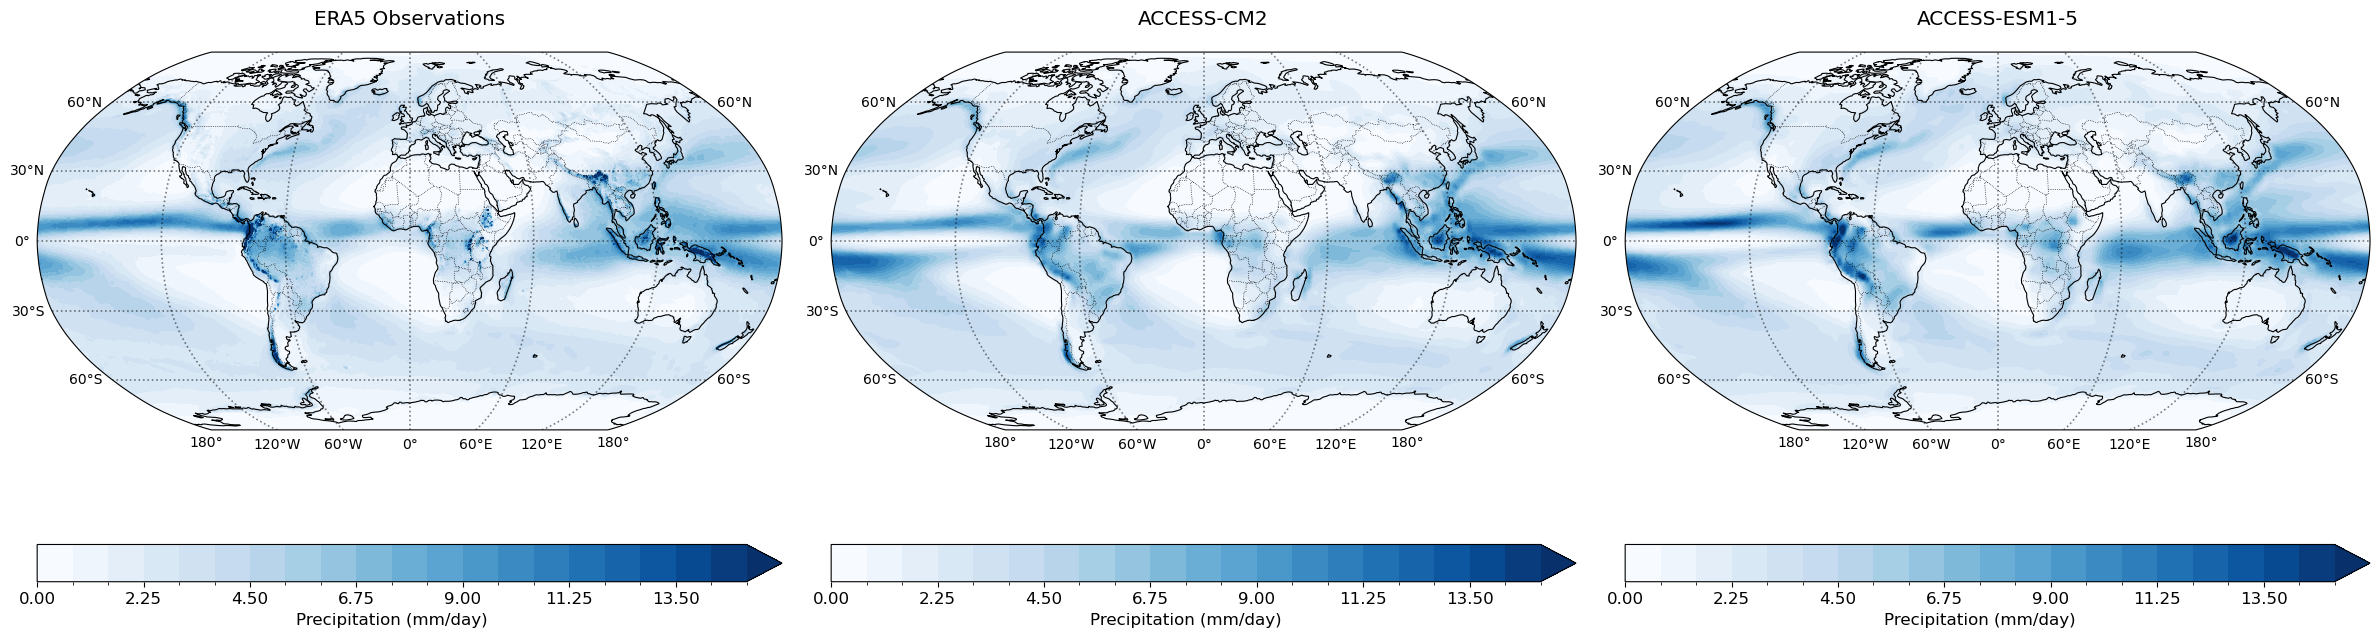

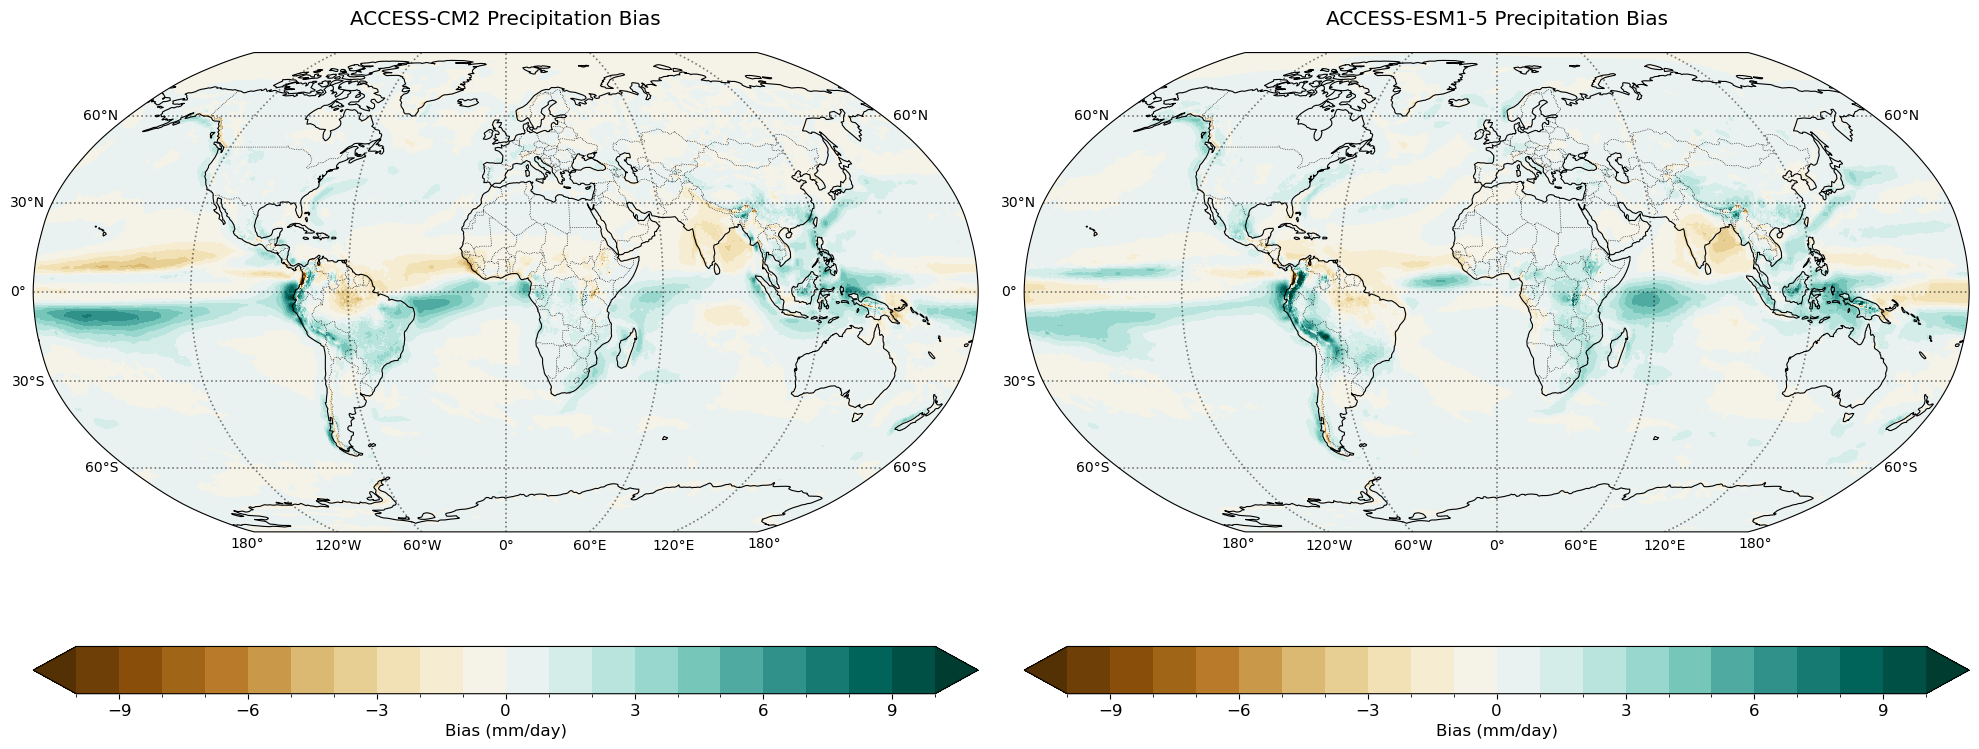

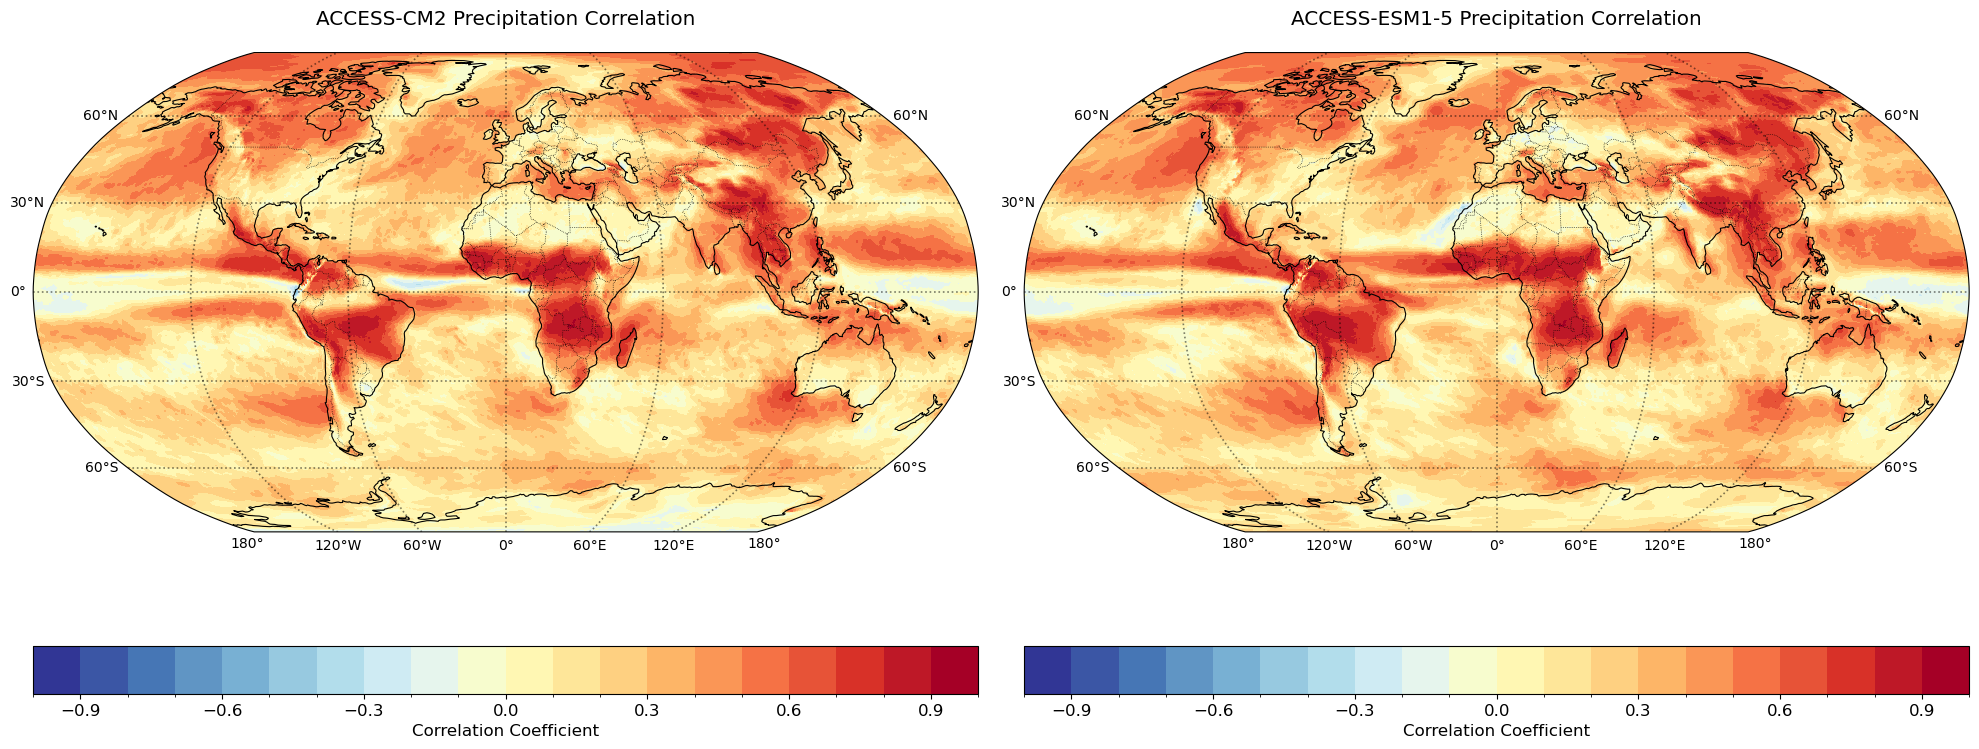

Failed to plot precipitation_rmse_comparison.png: Unable to allocate 3.45 PiB for an array with shape (30, 721, 1440, 30, 721, 1440) and data type float32
Failed to process precipitation: Unable to allocate 3.45 PiB for an array with shape (30, 721, 1440, 30, 721, 1440) and data type float32


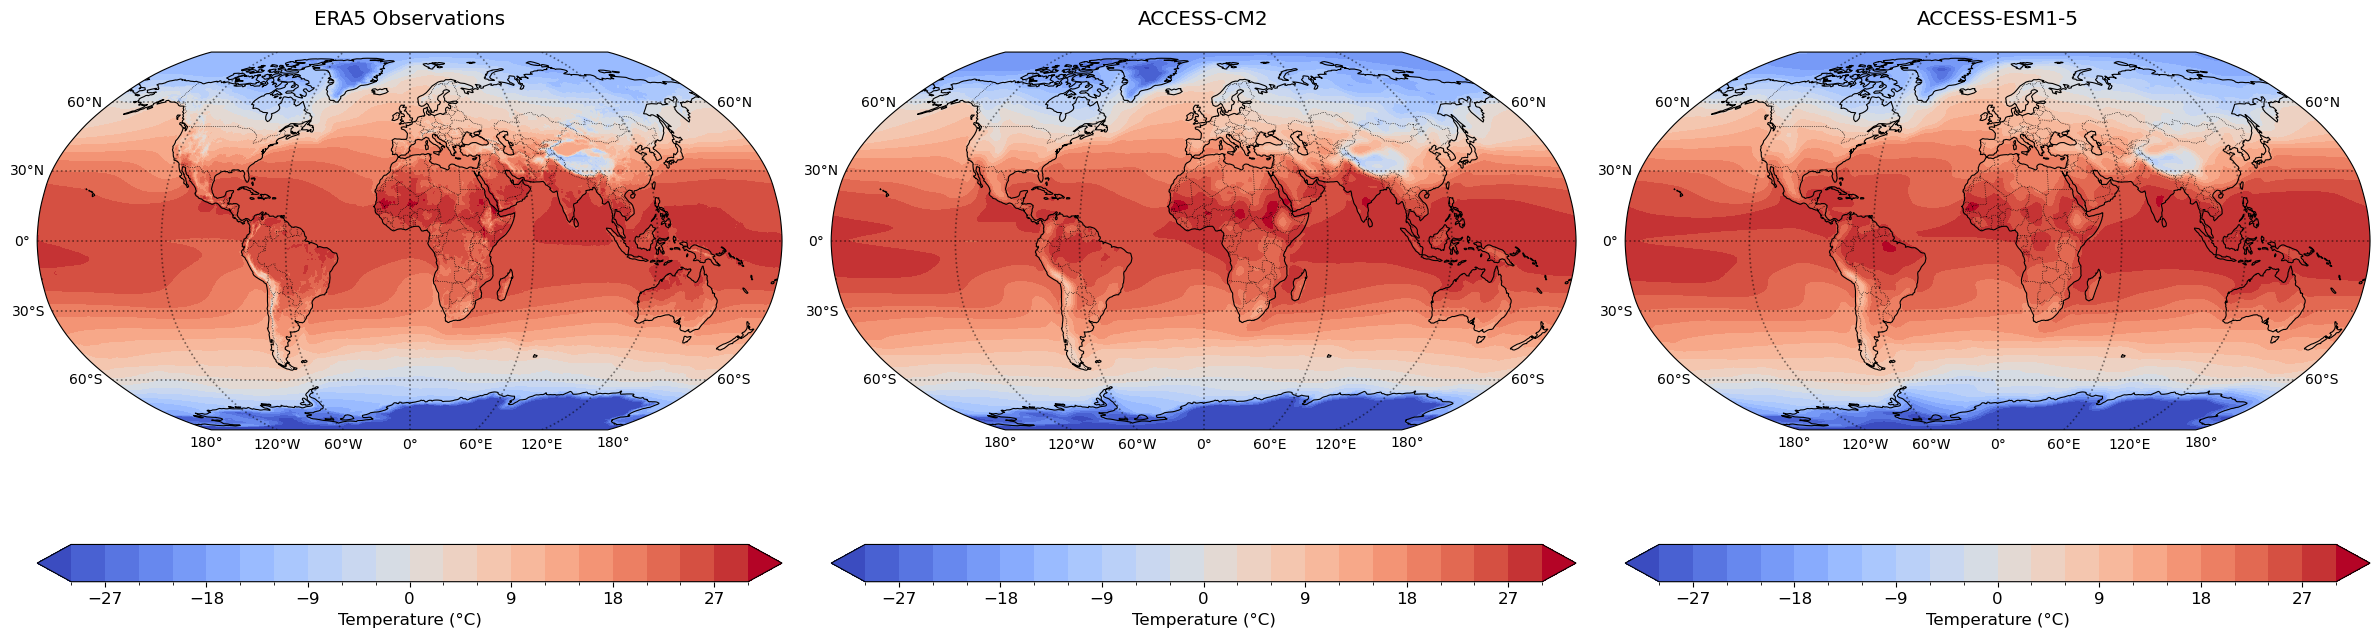

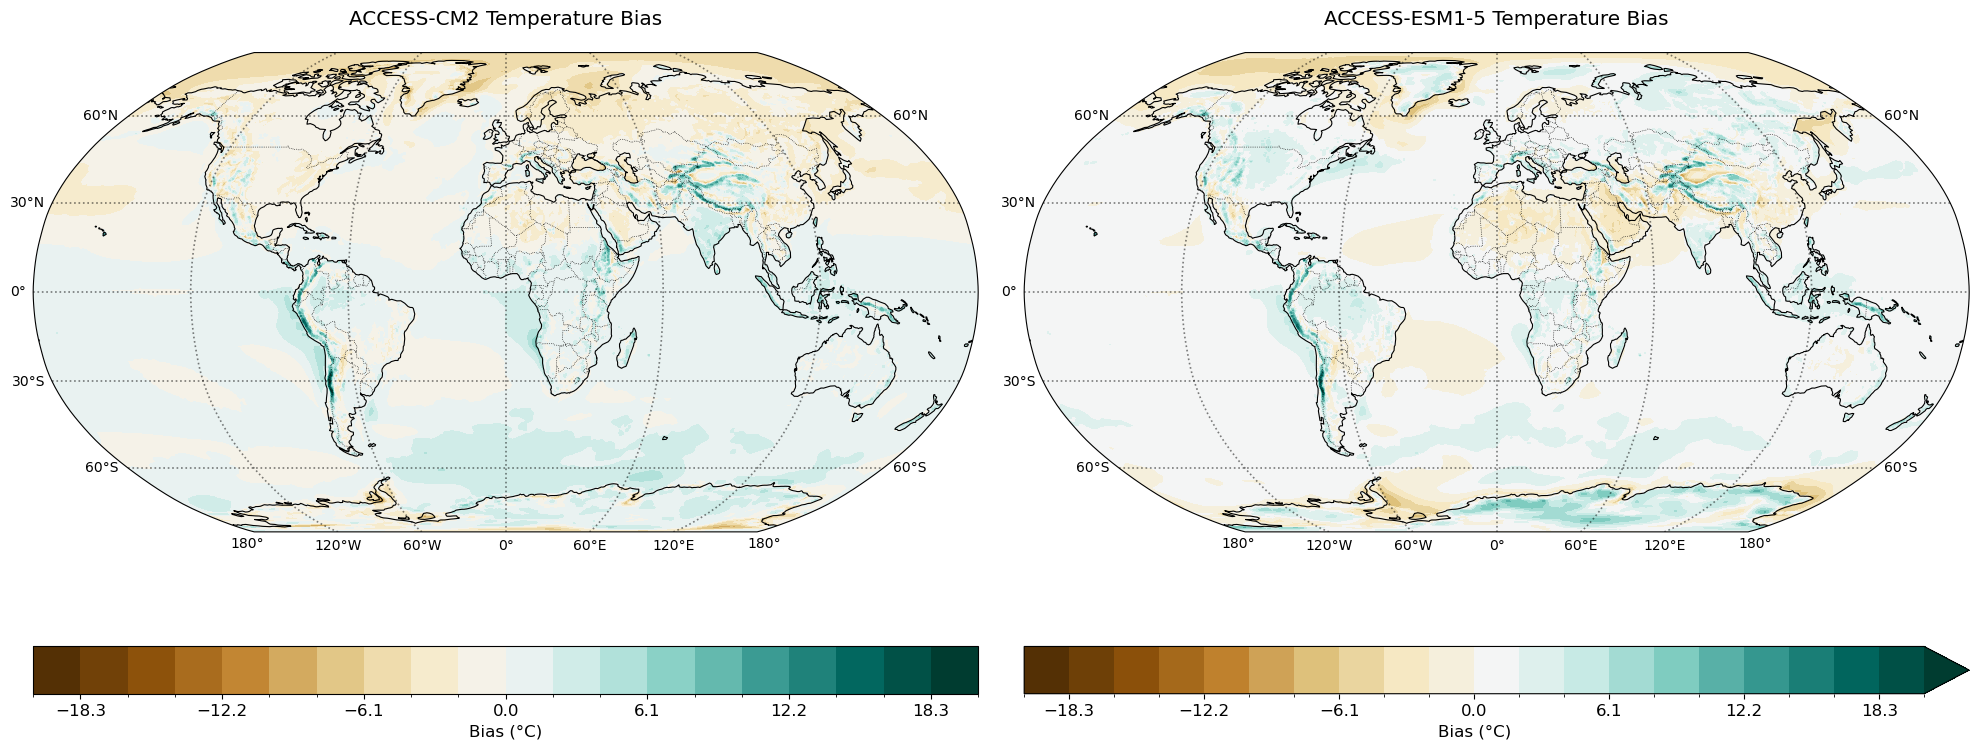

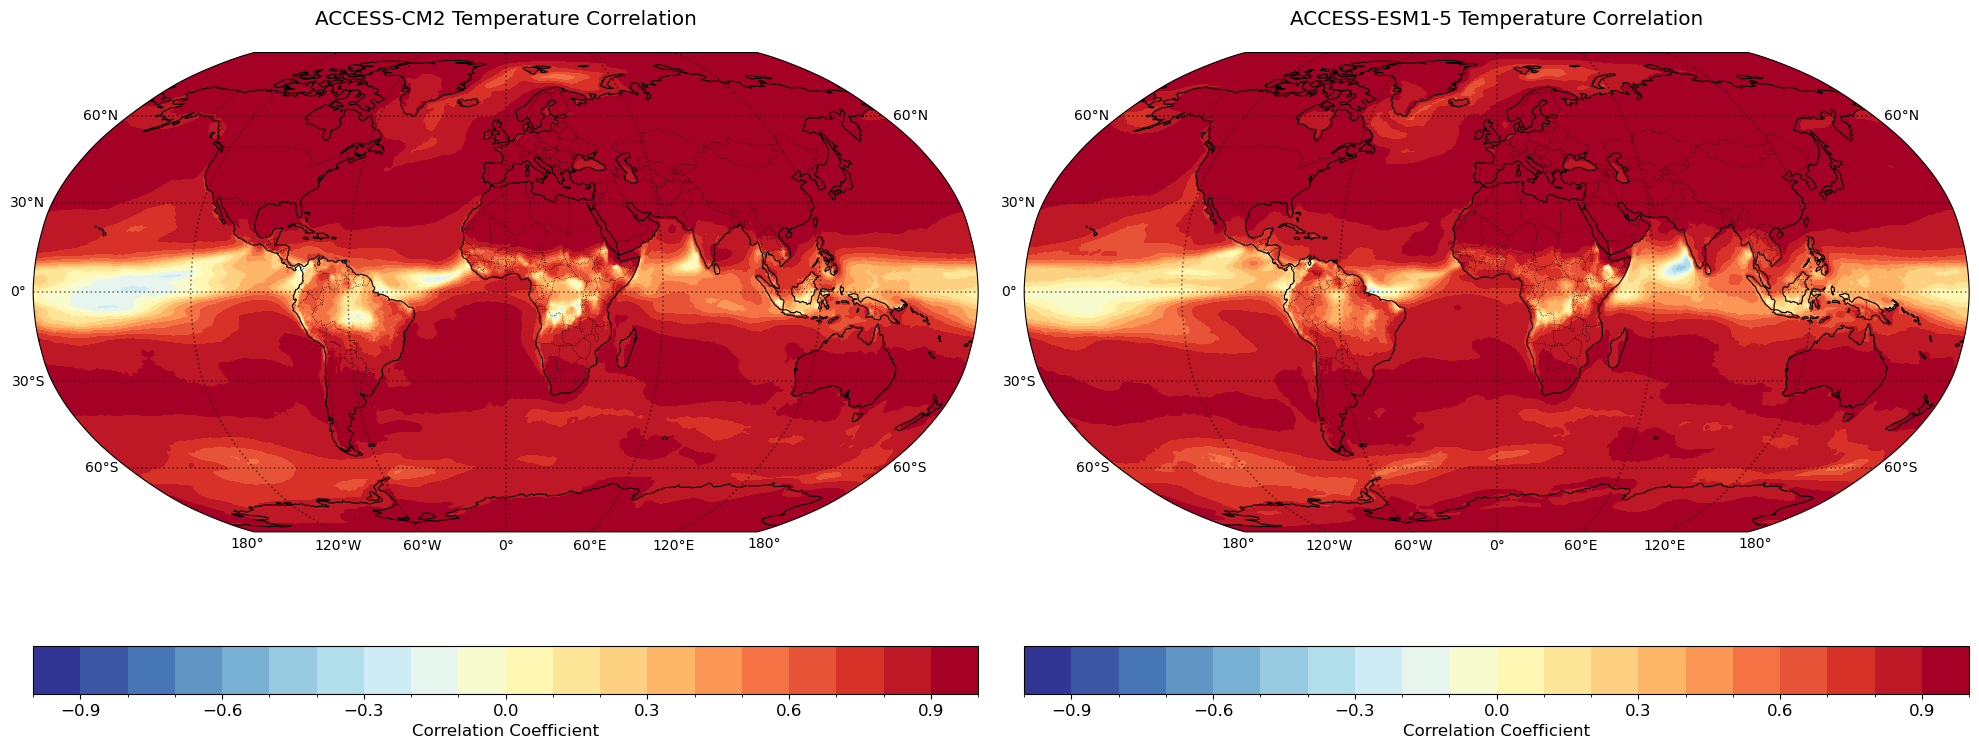

Failed to plot temperature_rmse_comparison.png: Unable to allocate 3.45 PiB for an array with shape (30, 721, 1440, 30, 721, 1440) and data type float32
Failed to process temperature: Unable to allocate 3.45 PiB for an array with shape (30, 721, 1440, 30, 721, 1440) and data type float32
All plots saved to new_plots directory


In [8]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from IPython.display import display

# Set paths
output_dir = "model_trial"
plot_dir = "new_plots"
os.makedirs(plot_dir, exist_ok=True)

# Custom plot settings
plt.rcParams.update({'font.size': 12})

# Colormaps
PRECIP_CMAP = 'Blues'
TEMP_CMAP = 'coolwarm'
BIAS_CMAP = 'BrBG'
CORR_CMAP = 'RdYlBu_r'
RMSE_CMAP = 'YlOrRd'

def prepare_data(da):
    """Ensure data is 2D by taking mean over time if needed"""
    time_dims = [dim for dim in da.dims if dim in ['time', 'valid_time', 't']]
    if time_dims:
        da = da.mean(dim=time_dims)
    
    lat_dims = [dim for dim in da.dims if dim in ['lat', 'latitude', 'y']]
    lon_dims = [dim for dim in da.dims if dim in ['lon', 'longitude', 'x']]
    
    if not lat_dims or not lon_dims:
        raise ValueError("Cannot identify spatial dimensions")
    
    return da.transpose(*lat_dims, *lon_dims)

def calculate_rmse(model_data, obs_data):
    """Calculate root mean squared error"""
    return np.sqrt(np.mean((model_data - obs_data)**2))

def plot_climatology(models, variable_type):
    """Plot climatology for obs + models (3 panels)"""
    var = 'pr' if variable_type == 'precipitation' else 'tas'
    obs_var = 'avg_tprate' if variable_type == 'precipitation' else 't2m'
    fig, axes = plt.subplots(1, 3, figsize=(24, 8), 
                           subplot_kw={'projection': ccrs.Robinson()})
    
    try:
        # Set parameters based on variable type
        if variable_type == 'precipitation':
            cmap = PRECIP_CMAP
            units = 'Precipitation (mm/day)'
            vmin, vmax = 0, 15
        else:
            cmap = TEMP_CMAP
            units = 'Temperature (°C)'
            vmin, vmax = -30, 30
        
        # Plot observations
        obs_ds = xr.open_dataset(f"{output_dir}/obs_{var}_yrclim_{'mmday.nc' if variable_type == 'precipitation' else 'C.nc'}")
        obs_data = prepare_data(obs_ds[obs_var])
        obs_data.plot.contourf(ax=axes[0], transform=ccrs.PlateCarree(),
                             cmap=cmap, levels=21, vmin=vmin, vmax=vmax,
                             cbar_kwargs={'label': units, 'orientation': 'horizontal'})
        axes[0].set_title('ERA5 Observations', pad=20)
        
        # Plot each model
        for i, model in enumerate(models, 1):
            model_ds = xr.open_dataset(f"{output_dir}/{var}_{model}_yrclim_{'mmday.nc' if variable_type == 'precipitation' else 'C.nc'}")
            model_data = prepare_data(model_ds[var])
            model_data.plot.contourf(ax=axes[i], transform=ccrs.PlateCarree(),
                                   cmap=cmap, levels=21, vmin=vmin, vmax=vmax,
                                   cbar_kwargs={'label': units, 'orientation': 'horizontal'})
            axes[i].set_title(model, pad=20)
        
        # Add map features and gridlines to all subplots
        for ax in axes:
            ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
            ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
            gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                            linewidth=1.2, color='black', alpha=0.5, linestyle=':')
            gl.top_labels = False
            gl.right_labels = False
            gl.xlabel_style = {'size': 10, 'color': 'black'}
            gl.ylabel_style = {'size': 10, 'color': 'black'}
        
        plt.tight_layout()
        filename = f"{variable_type}_climatology_comparison.png"
        plt.savefig(os.path.join(plot_dir, filename), bbox_inches='tight', dpi=300)
        display(fig)
        plt.close()
    except Exception as e:
        print(f"Failed to plot climatology for {variable_type}: {str(e)}")
        plt.close()

def plot_side_by_side(models, data_func, titles, filename, variable_type, plot_type='bias'):
    """Plot two models side by side with gridlines"""
    fig, axes = plt.subplots(1, 2, figsize=(20, 8), 
                           subplot_kw={'projection': ccrs.Robinson()})
    
    try:
        # Set parameters based on plot type
        if plot_type == 'bias':
            cmap = BIAS_CMAP
            if variable_type == 'precipitation':
                units = 'Bias (mm/day)'
                levels = np.linspace(-10, 10, 21)
            else:
                units = 'Bias (°C)'
                max_abs = np.nanmax(np.abs(prepare_data(data_func(models[0])).values))
                levels = np.linspace(-max_abs, max_abs, 21)
        elif plot_type == 'correlation':
            cmap = CORR_CMAP
            units = 'Correlation Coefficient'
            levels = np.linspace(-1, 1, 21)
        elif plot_type == 'rmse':
            cmap = RMSE_CMAP
            if variable_type == 'precipitation':
                units = 'RMSE (mm/day)'
                levels = np.linspace(0, 10, 21)  # Fixed range for precipitation RMSE
            else:
                units = 'RMSE (°C)'
                levels = np.linspace(0, 5, 21)   # Fixed range for temperature RMSE
        
        for i, (model, ax) in enumerate(zip(models, axes)):
            # Get data using the provided function
            data = data_func(model)
            plot_data = prepare_data(data)
            
            # Plot the data
            plot_data.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),
                                 cmap=cmap, levels=levels,
                                 cbar_kwargs={'label': units, 'orientation': 'horizontal'})
            
            # Add map features
            ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
            ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
            
            # Configure gridlines
            gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                            linewidth=1.2, color='black', alpha=0.5, linestyle=':')
            gl.top_labels = False
            gl.right_labels = False
            gl.xlabel_style = {'size': 10, 'color': 'black'}
            gl.ylabel_style = {'size': 10, 'color': 'black'}
            
            ax.set_title(titles[i], pad=20)
        
        plt.tight_layout()
        plt.savefig(os.path.join(plot_dir, filename), bbox_inches='tight', dpi=300)
        display(fig)
        plt.close()
    except Exception as e:
        print(f"Failed to plot {filename}: {str(e)}")
        plt.close()

def plot_seasonal_cycle(models, variable_type):
    """Plot monthly climatology comparison"""
    fig = plt.figure(figsize=(10, 6))
    var = 'pr' if variable_type == 'precipitation' else 'tas'
    obs_var = 'avg_tprate' if variable_type == 'precipitation' else 't2m'
    units = 'Precipitation (mm/day)' if variable_type == 'precipitation' else 'Temperature (°C)'
    
    try:
        # Load observed data
        obs_ds = xr.open_dataset(f"{output_dir}/obs_{var}_monclim_{'mmday.nc' if variable_type == 'precipitation' else 'C.nc'}")
        obs_data = obs_ds[obs_var]
        
        # Calculate global mean
        lat_dims = [dim for dim in obs_data.dims if dim in ['lat', 'latitude', 'y']]
        lon_dims = [dim for dim in obs_data.dims if dim in ['lon', 'longitude', 'x']]
        global_obs = obs_data.mean(dim=(lat_dims[0], lon_dims[0]))
        
        plt.plot(global_obs, label='ERA5', color='black', linewidth=3, marker='o')
        
        # Plot each model
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Distinct colors for models
        for i, model in enumerate(models):
            ds = xr.open_dataset(f"{output_dir}/{var}_{model}_monclim_{'mmday.nc' if variable_type == 'precipitation' else 'C.nc'}")
            model_data = ds[var]
            
            lat_dims = [dim for dim in model_data.dims if dim in ['lat', 'latitude', 'y']]
            lon_dims = [dim for dim in model_data.dims if dim in ['lon', 'longitude', 'x']]
            global_mean = model_data.mean(dim=(lat_dims[0], lon_dims[0]))
            
            plt.plot(global_mean, label=model, color=colors[i], linestyle='--', marker='o')
        
        plt.title(f"Global Mean {variable_type.capitalize()} Seasonal Cycle")
        plt.xlabel('Month')
        plt.ylabel(units)
        plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        filename = f"{variable_type}_seasonal_cycle.png"
        plt.savefig(os.path.join(plot_dir, filename), bbox_inches='tight', dpi=300)
        display(fig)
        plt.close()
    except Exception as e:
        print(f"Failed to plot seasonal cycle for {variable_type}: {str(e)}")
        plt.close()

def create_comparison_plots():
    """Create all comparison plots"""
    models = ['ACCESS-CM2', 'ACCESS-ESM1-5']
    
    for variable_type in ['precipitation', 'temperature']:
        var = 'pr' if variable_type == 'precipitation' else 'tas'
        obs_var = 'avg_tprate' if variable_type == 'precipitation' else 't2m'
        
        try:
            # 1. First plot climatology comparison (3 panels)
            plot_climatology(models, variable_type)
            
            # Load observed data for calculations
            obs_ds = xr.open_dataset(f"{output_dir}/obs_{var}_yrclim_{'mmday.nc' if variable_type == 'precipitation' else 'C.nc'}")
            obs_data = obs_ds[obs_var]
            
            # Define data access functions
            def get_bias_data(model):
                ds = xr.open_dataset(f"{output_dir}/{var}_{model}_yrbias_{'mmday.nc' if variable_type == 'precipitation' else 'C.nc'}")
                return ds[var]
            
            def get_corr_data(model):
                ds = xr.open_dataset(f"{output_dir}/{var}_{model}_correlation.nc")
                return ds[var]
            
            def get_rmse_data(model):
                model_ds = xr.open_dataset(f"{output_dir}/{var}_{model}_yrclim_{'mmday.nc' if variable_type == 'precipitation' else 'C.nc'}")
                model_data = model_ds[var]
                if model_data.dims != obs_data.dims:
                    model_data = model_data.interp_like(obs_data)
                return np.sqrt((model_data - obs_data)**2)
            
            # 2. Plot bias, correlation, and RMSE comparisons
            plot_side_by_side(models, get_bias_data, 
                            [f"{model} {variable_type.capitalize()} Bias" for model in models],
                            f"{variable_type}_bias_comparison.png", variable_type, 'bias')
            
            plot_side_by_side(models, get_corr_data,
                            [f"{model} {variable_type.capitalize()} Correlation" for model in models],
                            f"{variable_type}_corr_comparison.png", variable_type, 'correlation')
            
            plot_side_by_side(models, get_rmse_data,
                            [f"{model} {variable_type.capitalize()} RMSE" for model in models],
                            f"{variable_type}_rmse_comparison.png", variable_type, 'rmse')
            
            # Print RMSE values
            for model in models:
                rmse = calculate_rmse(get_rmse_data(model).values, np.zeros_like(get_rmse_data(model).values))
                print(f"{model} {variable_type} RMSE: {rmse:.2f}")
            
            # 3. Plot seasonal cycle at the end
            plot_seasonal_cycle(models, variable_type)
                
        except Exception as e:
            print(f"Failed to process {variable_type}: {str(e)}")
            continue

    print(f"All plots saved to {plot_dir} directory")

create_comparison_plots()

### Cloud cover

In [ ]:
%%bash

# Cloud Cover Processing: Global Maps + Subdomain Analysis
INPUT_FILE="cc_ERA5_1991-2020.nc"
OUTPUT_DIR="cloud_output"
mkdir -p "$OUTPUT_DIR"

# Subdomain bounds (Asante Akim North)
LON_MIN=-1.20
LON_MAX=-0.15
LAT_MIN=6.30
LAT_MAX=7.30

#  GLOBAL SPATIAL MAPS
echo "Processing global spatial maps..."
cdo yearmean "$INPUT_FILE" "${OUTPUT_DIR}/global_annual_means.nc"                # Annual means (30 years)
cdo timmean "${OUTPUT_DIR}/global_annual_means.nc" "${OUTPUT_DIR}/global_clim_mean.nc"  # 30-year climatology

#  SUBDOMAIN ANALYSIS 
echo "Processing subdomain (Asante Akim North)..."
cdo sellonlatbox,$LON_MIN,$LON_MAX,$LAT_MIN,$LAT_MAX "$INPUT_FILE" "${OUTPUT_DIR}/subdomain.nc"

# Monthly climatology (12-month cycle)
cdo ymonmean "${OUTPUT_DIR}/subdomain.nc" "${OUTPUT_DIR}/subdomain_monthly_clim.nc"
cdo fldmean "${OUTPUT_DIR}/subdomain_monthly_clim.nc" "${OUTPUT_DIR}/subdomain_annual_cycle.nc"

# Vertical profiles (high/mid/low clouds)
cdo sellevidx,1/3   "${OUTPUT_DIR}/subdomain.nc" "${OUTPUT_DIR}/subdomain_high_clouds.nc"   # 100-200 hPa
cdo sellevidx,20/23 "${OUTPUT_DIR}/subdomain.nc" "${OUTPUT_DIR}/subdomain_mid_clouds.nc"   # 500-700 hPa
cdo sellevidx,37    "${OUTPUT_DIR}/subdomain.nc" "${OUTPUT_DIR}/subdomain_low_clouds.nc"   # 1000 hPa

# Convert all to percentage (0-100%)
for file in global_annual_means global_clim_mean subdomain_monthly_clim subdomain_annual_cycle subdomain_high_clouds subdomain_mid_clouds subdomain_low_clouds; do
    cdo mulc,100 "${OUTPUT_DIR}/${file}.nc" "${OUTPUT_DIR}/${file}_percent.nc"
done

echo "Processing complete! Outputs saved in ${OUTPUT_DIR}/"

Processing global spatial maps...


cdi  warning (cdfScanVarAttr): NetCDF: Variable not found - >isobaricInhPa<
variables): Unsupported data type (char/string), skipped variable expver!
cdi  warning (cdfInqContents): Coordinates variable number can't be assigned!


Processing subdomain (Asante Akim North)...


cdi  warning (cdfScanVarAttr): NetCDF: Variable not found - >isobaricInhPa<
variables): Unsupported data type (char/string), skipped variable expver!
ts): Coordinates variable number can't be assigned!


In [ ]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from IPython.display import display

#  GLOBAL SPATIAL PLOTS 
def plot_global_maps(output_dir="cloud_output"):
    # 30-Year Climatological Mean
    ds = xr.open_dataset(f"{output_dir}/global_clim_mean_percent.nc")
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
    ds['cc'].plot(ax=ax, cmap='GREYS', vmin=0, vmax=100)
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_title("Global Mean Cloud Cover (1991-2020, %)")
    plt.savefig(f"{output_dir}/global_clim_map.png", dpi=300, bbox_inches='tight')
    plt.close()

#  SUBDOMAIN ANALYSIS 
def plot_subdomain(output_dir="cloud_output"):
    # Annual Cycle
    ds_cycle = xr.open_dataset(f"{output_dir}/subdomain_annual_cycle_percent.nc")
    fig, ax = plt.subplots(figsize=(10, 4))
    ds_cycle['tcc'].plot(ax=ax, marker='o', color='purple', linewidth=2)
    ax.set_title("Subdomain Annual Cycle of Cloud Cover (%)")
    ax.set_ylabel("Cloud Cover (%)")
    ax.set_xticks(np.arange(12))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
    # Vertical Profiles
    fig, ax = plt.subplots(figsize=(8, 5))
    for name, color, label in zip(
        ['high', 'mid', 'low'],
        ['red', 'green', 'blue'],
        ['High (100-200 hPa)', 'Mid (500-700 hPa)', 'Low (1000 hPa)']
    ):
        ds = xr.open_dataset(f"{output_dir}/subdomain_{name}_clouds_percent.nc")
        ds['tcc'].mean(dim=['lon', 'lat']).plot(ax=ax, color=color, label=label)
    ax.legend()
    ax.set_title("Subdomain Vertical Cloud Profiles")
    ax.set_ylabel("Cloud Cover (%)")
    plt.savefig(f"{output_dir}/subdomain_vertical_profiles.png", dpi=300, bbox_inches='tight')
    plt.close()

if __name__ == "__main__":
    plot_global_maps()
    plot_subdomain()
    print(f"Plots saved to {OUTPUT_DIR}/")